# Cryptocurrency Subreddit Analysis

## Objective:
The main goal of this project is to understand and analyze the discussions happening in various cryptocurrency-related subreddits. By using different text analysis techniques, we aim to identify the key topics, trends, and sentiments within these discussions.

## Goal
The goals of this project are to discover the main topics being discussed in cryptocurrency subreddits, identify trends and patterns in the discussions over time, determine the overall sentiment (positive, neutral, or negative) of the discussions, compare different topic modeling techniques (NMF, LSA, and LDA) to find the most coherent topics, and gain valuable insights into the interests and sentiments of the cryptocurrency community.

### Imports 

In [2]:
#!pip install vaderSentiment
#!pip install python-dotenv
#!pip install pyLDAvis==3.4.1 --user

In [3]:
import pandas as pd
import os
from dotenv import load_dotenv
import json
import re
import requests
from extract_reddit_data import RedditAPI
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Extra packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim_models as gensimvis
import gensim
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel   # Compare the coherence of topics generated by NMF, LSA, and LDA

/Users/aryasmc/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to /Users/aryasmc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryasmc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
from sklearn.decomposition import NMF
from sklearn.model_selection import ParameterGrid
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from sklearn.decomposition import LatentDirichletAllocation


In [4]:
from extract_reddit_data import RedditAPI

In [5]:
reddit_api = RedditAPI()
cryptocurrency = reddit_api.get_crypto_curr_data()
cryptomarkets = reddit_api.get_crypto_markets_data()
bitcoin = reddit_api.get_bitcoin_data()
eth= reddit_api.get_eth_data()
binance = reddit_api.get_binance_data()
solana = reddit_api.get_solana_data()
ripple = reddit_api.get_ripple_data()
cardano = reddit_api.get_cardano_data()
tronix = reddit_api.get_tronix_data()
chainlink = reddit_api.get_chainlink_data()

### understand the Databases 


In [6]:
def print_dataframe_shape(df, name):
    rows, columns = df.shape
    print(f"{name} database has {rows} rows and {columns} columns.")

print_dataframe_shape(cryptocurrency, "Cryptocurrency")
print_dataframe_shape(cryptomarkets, "Crypto Markets")
print_dataframe_shape(bitcoin, "Bitcoin")
print_dataframe_shape(eth, "Ethereum")
print_dataframe_shape(binance, "Binance")
print_dataframe_shape(solana, "Solana")
print_dataframe_shape(ripple, "Ripple")
print_dataframe_shape(cardano, "Cardano")
print_dataframe_shape(tronix, "Tronix")
print_dataframe_shape(chainlink, "Chainlink")

Cryptocurrency database has 102 rows and 9 columns.
Crypto Markets database has 101 rows and 9 columns.
Bitcoin database has 102 rows and 9 columns.
Ethereum database has 100 rows and 9 columns.
Binance database has 101 rows and 9 columns.
Solana database has 102 rows and 9 columns.
Ripple database has 102 rows and 9 columns.
Cardano database has 102 rows and 9 columns.
Tronix database has 101 rows and 9 columns.
Chainlink database has 100 rows and 9 columns.


In [7]:
def dataframe_description(df, name):
    print(f"{name} description:")
    info = df.describe()
    return info

# Print description for each DataFrame
print(dataframe_description(cryptocurrency, "Cryptocurrency"))
print(dataframe_description(cryptomarkets, "Crypto Markets"))
print(dataframe_description(bitcoin, "Bitcoin"))
print(dataframe_description(eth, "Ethereum"))
print(dataframe_description(binance, "Binance"))
print(dataframe_description(solana, "Solana"))
print(dataframe_description(ripple, "Ripple"))
print(dataframe_description(cardano, "Cardano"))
print(dataframe_description(tronix, "Tronix"))
print(dataframe_description(chainlink, "Chainlink"))

Cryptocurrency description:
       upvote_ratio         ups  downs       score
count    102.000000  102.000000  102.0  102.000000
mean       0.604804   78.656863    0.0   78.656863
std        0.239549  170.563103    0.0  170.563103
min        0.050000    0.000000    0.0    0.000000
25%        0.402500    0.000000    0.0    0.000000
50%        0.665000   14.000000    0.0   14.000000
75%        0.810000   66.000000    0.0   66.000000
max        0.940000  925.000000    0.0  925.000000
Crypto Markets description:
       upvote_ratio         ups  downs       score
count    101.000000  101.000000  101.0  101.000000
mean       0.693465    4.910891    0.0    4.910891
std        0.278630   12.760955    0.0   12.760955
min        0.100000    0.000000    0.0    0.000000
25%        0.500000    0.000000    0.0    0.000000
50%        0.740000    1.000000    0.0    1.000000
75%        1.000000    3.000000    0.0    3.000000
max        1.000000   87.000000    0.0   87.000000
Bitcoin description:
     

In [8]:
def missing_values(df, name):
    print(f"{name} number of missing values:")
    missing_values = df.isna().sum()
    print(missing_values)
    return missing_values

# Checking missing values for each DataFrame
print(missing_values(cryptocurrency, "Cryptocurrency"))
print(missing_values(cryptomarkets, "Crypto Markets"))
print(missing_values(bitcoin, "Bitcoin"))
print(missing_values(eth, "Ethereum"))
print(missing_values(binance, "Binance"))
print(missing_values(solana, "Solana"))
print(missing_values(ripple, "Ripple"))
print(missing_values(cardano, "Cardano"))
print(missing_values(tronix, "Tronix"))
print(missing_values(chainlink, "Chainlink"))

Cryptocurrency number of missing values:
approved_date    102
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
approved_date    102
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
Crypto Markets number of missing values:
approved_date    101
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
approved_date    101
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
Bitcoin number of missing values:
approved_date    102
thread_id          0
subreddit          0
title        

In [9]:
def clean_body_column(df, name):
    print(f"Cleaning 'body' column for {name} database.")
    # Replace empty strings with NaN
    df['body'].replace('', np.nan, inplace=True)
    # Drop rows with NaN values in the 'body' column
    df.dropna(subset=['body'], inplace=True)
    print(f"Number of rows after cleaning: {len(df)}")
    return df

# Cleaning 'body' column for each DataFrame
cryptocurrency = clean_body_column(cryptocurrency, "Cryptocurrency")
cryptomarkets = clean_body_column(cryptomarkets, "Crypto Markets")
bitcoin = clean_body_column(bitcoin, "Bitcoin")
eth = clean_body_column(eth, "Ethereum")
binance = clean_body_column(binance, "Binance")
solana = clean_body_column(solana, "Solana")
ripple = clean_body_column(ripple, "Ripple")
cardano = clean_body_column(cardano, "Cardano")
tronix = clean_body_column(tronix, "Tronix")
chainlink = clean_body_column(chainlink, "Chainlink")

Cleaning 'body' column for Cryptocurrency database.
Number of rows after cleaning: 43
Cleaning 'body' column for Crypto Markets database.
Number of rows after cleaning: 32
Cleaning 'body' column for Bitcoin database.
Number of rows after cleaning: 71
Cleaning 'body' column for Ethereum database.
Number of rows after cleaning: 72
Cleaning 'body' column for Binance database.
Number of rows after cleaning: 84
Cleaning 'body' column for Solana database.
Number of rows after cleaning: 92
Cleaning 'body' column for Ripple database.
Number of rows after cleaning: 91
Cleaning 'body' column for Cardano database.
Number of rows after cleaning: 50
Cleaning 'body' column for Tronix database.
Number of rows after cleaning: 72
Cleaning 'body' column for Chainlink database.
Number of rows after cleaning: 65


/var/folders/hm/_kmly7bs42gf5b9mpld3lp1r0000gn/T/ipykernel_26129/2515542157.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body'].replace('', np.nan, inplace=True)
/var/folders/hm/_kmly7bs42gf5b9mpld3lp1r0000gn/T/ipykernel_26129/2515542157.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [10]:
def drop_approved_date_column(df, name):
    if 'approved_date' in df.columns:
        df = df.drop(columns=['approved_date'])
        print(f"'approved_date' column removed from {name} database.")
    else:
        print(f"No 'approved_date' column found in {name} database.")
    return df

# Dropping 'approved_date' column from each DataFrame
cryptocurrency = drop_approved_date_column(cryptocurrency, "Cryptocurrency")
cryptomarkets = drop_approved_date_column(cryptomarkets, "Crypto Markets")
bitcoin = drop_approved_date_column(bitcoin, "Bitcoin")
eth = drop_approved_date_column(eth, "Ethereum")
binance = drop_approved_date_column(binance, "Binance")
solana = drop_approved_date_column(solana, "Solana")
ripple = drop_approved_date_column(ripple, "Ripple")
cardano = drop_approved_date_column(cardano, "Cardano")
tronix = drop_approved_date_column(tronix, "Tronix")
chainlink = drop_approved_date_column(chainlink, "Chainlink")

'approved_date' column removed from Cryptocurrency database.
'approved_date' column removed from Crypto Markets database.
'approved_date' column removed from Bitcoin database.
'approved_date' column removed from Ethereum database.
'approved_date' column removed from Binance database.
'approved_date' column removed from Solana database.
'approved_date' column removed from Ripple database.
'approved_date' column removed from Cardano database.
'approved_date' column removed from Tronix database.
'approved_date' column removed from Chainlink database.


In [11]:
def duplicated_dataframe(df, name):
    duplicate = df.duplicated().sum()
    print(f"{name} has {duplicate} duplicate values.")

# Checking duplicate for each DataFrame
duplicated_dataframe(cryptocurrency, "Cryptocurrency")
duplicated_dataframe(cryptomarkets, "Crypto Markets")
duplicated_dataframe(bitcoin, "Bitcoin")
duplicated_dataframe(eth, "Ethereum")
duplicated_dataframe(binance, "Binance")
duplicated_dataframe(solana, "Solana")
duplicated_dataframe(ripple, "Ripple")
duplicated_dataframe(cardano, "Cardano")
duplicated_dataframe(tronix, "Tronix")
duplicated_dataframe(chainlink, "Chainlink")

Cryptocurrency has 0 duplicate values.
Crypto Markets has 0 duplicate values.
Bitcoin has 0 duplicate values.
Ethereum has 0 duplicate values.
Binance has 0 duplicate values.
Solana has 0 duplicate values.
Ripple has 0 duplicate values.
Cardano has 0 duplicate values.
Tronix has 0 duplicate values.
Chainlink has 0 duplicate values.


In [12]:
def remove_outliers(df, column, z_thresh=3):
    mean_col = np.mean(df[column])
    std_col = np.std(df[column])
    z_scores = [(y - mean_col) / std_col for y in df[column]]
    filtered_entries = (np.abs(z_scores) < z_thresh)
    return df[filtered_entries]

cryptocurrency = remove_outliers(cryptocurrency, 'ups')
cryptocurrency = remove_outliers(cryptocurrency, 'score')
cryptomarkets = remove_outliers(cryptomarkets, 'ups')
cryptomarkets = remove_outliers(cryptomarkets, 'score')
bitcoin = remove_outliers(bitcoin, 'ups')
bitcoin = remove_outliers(bitcoin, 'score')
eth = remove_outliers(eth, 'ups')
eth = remove_outliers(eth, 'score')
binance = remove_outliers(binance, 'ups')
binance = remove_outliers(binance, 'score')
solana = remove_outliers(solana, 'ups')
solana = remove_outliers(solana, 'score')
ripple = remove_outliers(ripple, 'ups')
ripple = remove_outliers(ripple, 'score')
cardano = remove_outliers(cardano, 'ups')
cardano = remove_outliers(cardano, 'score')
tronix = remove_outliers(tronix, 'ups')
tronix = remove_outliers(tronix, 'score')
chainlink = remove_outliers(chainlink, 'ups')
chainlink = remove_outliers(chainlink, 'score')


### Exploratory Data Analysis (EDA):

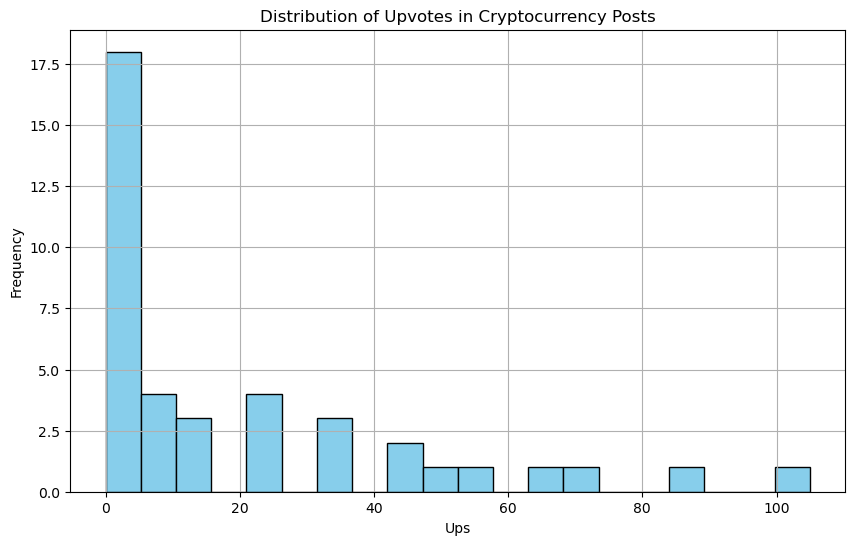

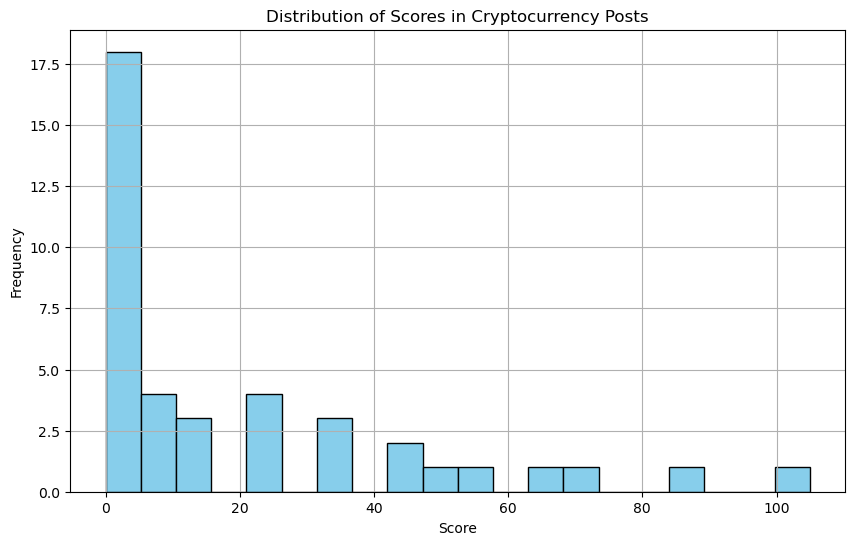

In [13]:
def plot_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot distribution of upvotes and scores for each cryptocurrency
plot_distribution(cryptocurrency, 'ups', 'Distribution of Upvotes in Cryptocurrency Posts')
plot_distribution(cryptocurrency, 'score', 'Distribution of Scores in Cryptocurrency Posts')


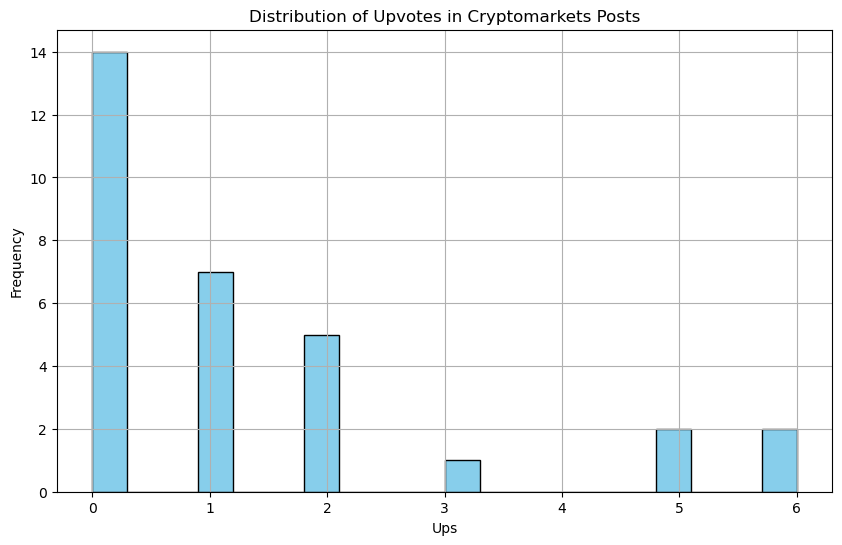

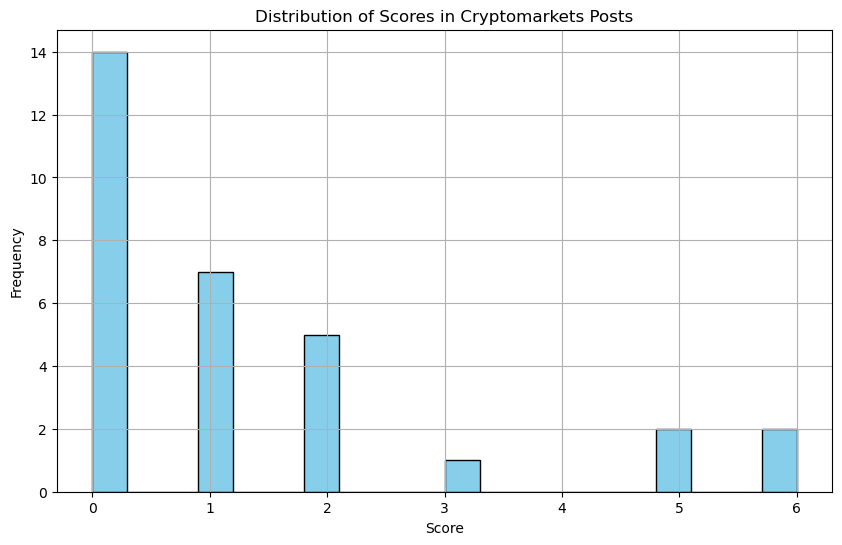

In [14]:
plot_distribution(cryptomarkets, 'ups', 'Distribution of Upvotes in Cryptomarkets Posts')
plot_distribution(cryptomarkets, 'score', 'Distribution of Scores in Cryptomarkets Posts')

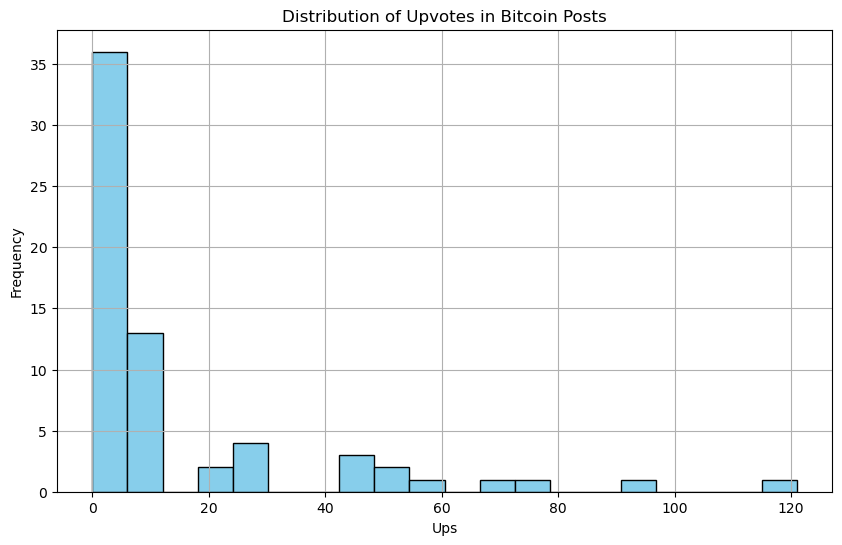

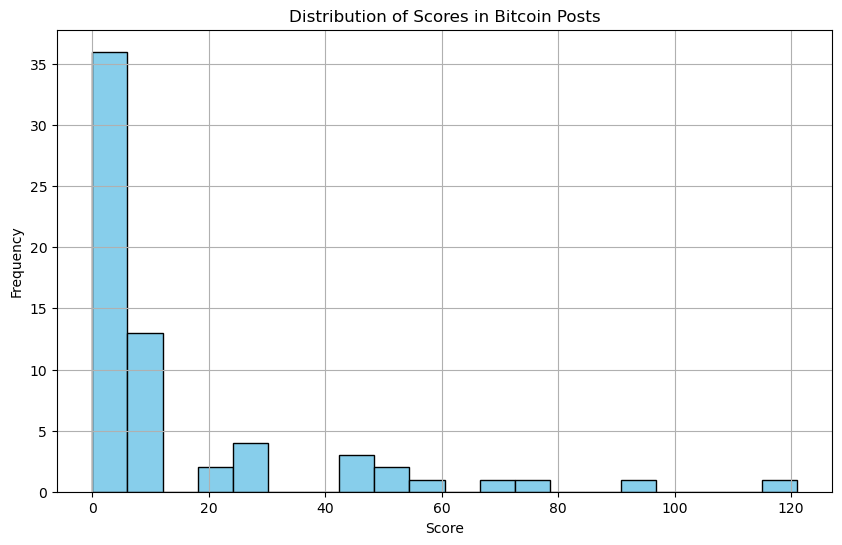

In [15]:
plot_distribution(bitcoin, 'ups', 'Distribution of Upvotes in Bitcoin Posts')
plot_distribution(bitcoin, 'score', 'Distribution of Scores in Bitcoin Posts')

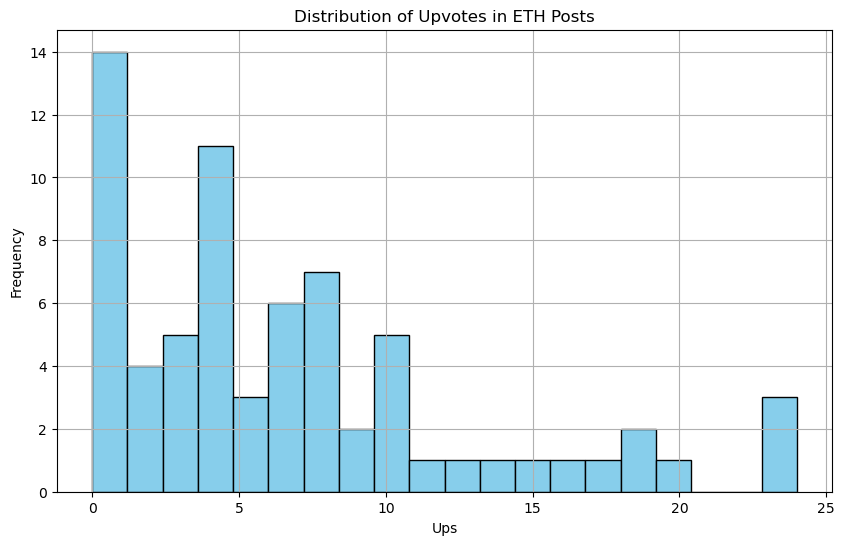

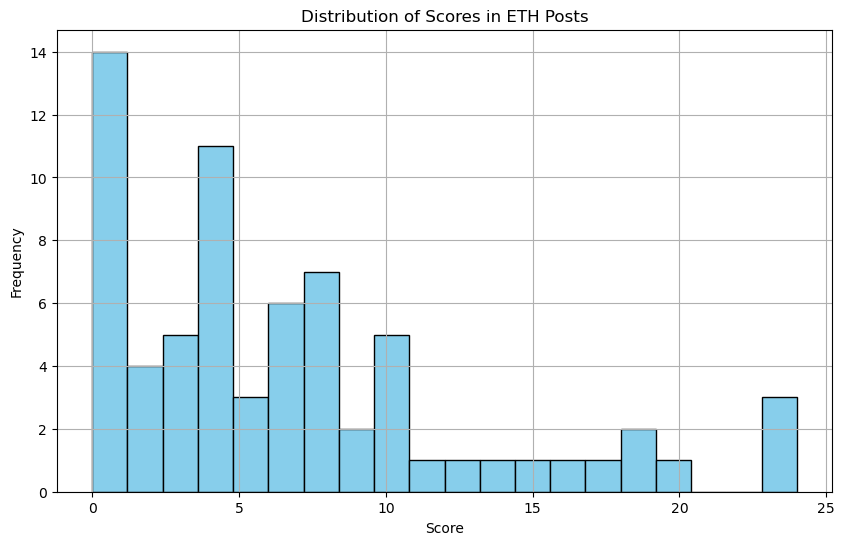

In [16]:
plot_distribution(eth, 'ups', 'Distribution of Upvotes in ETH Posts')
plot_distribution(eth, 'score', 'Distribution of Scores in ETH Posts')

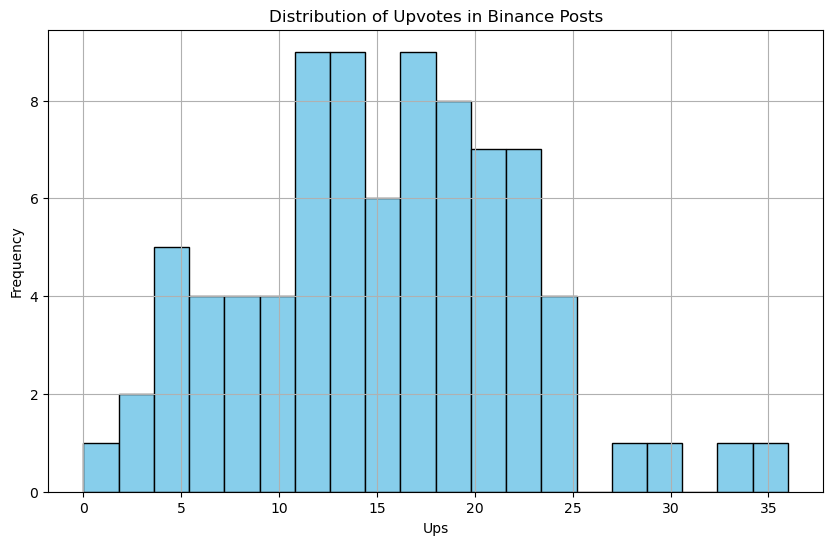

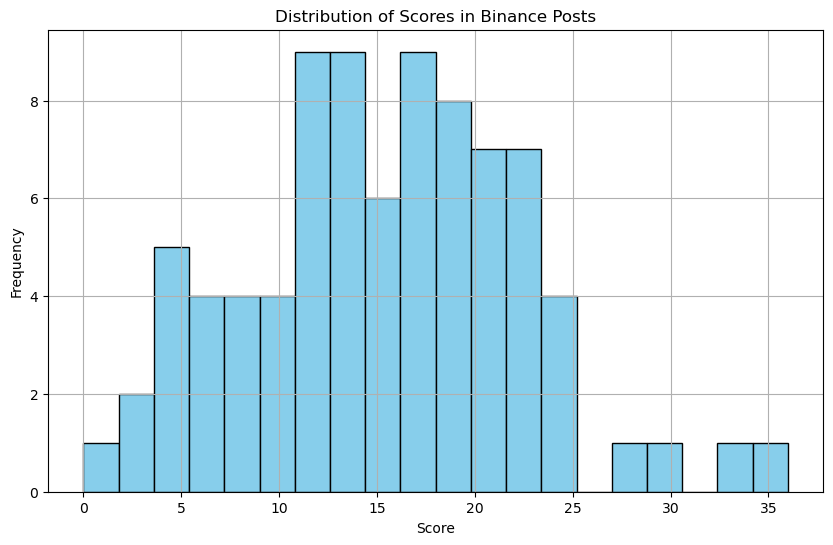

In [17]:
plot_distribution(binance, 'ups', 'Distribution of Upvotes in Binance Posts')
plot_distribution(binance, 'score', 'Distribution of Scores in Binance Posts')

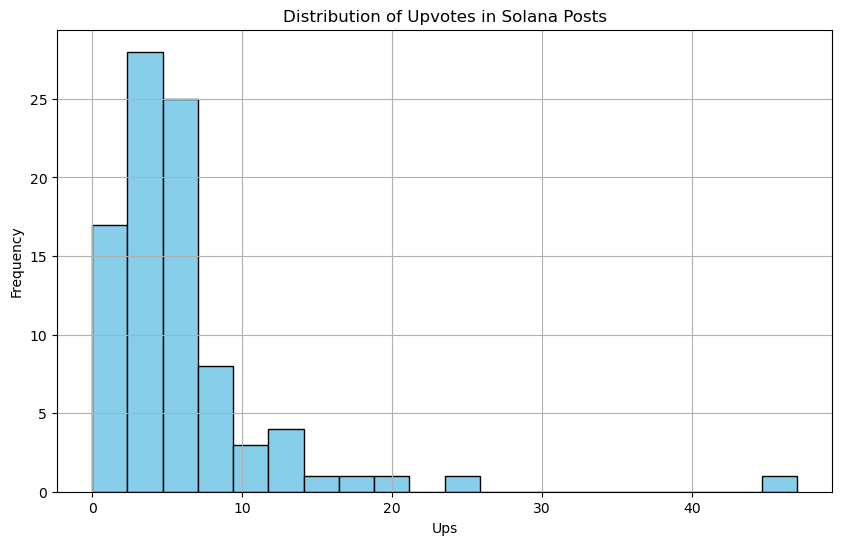

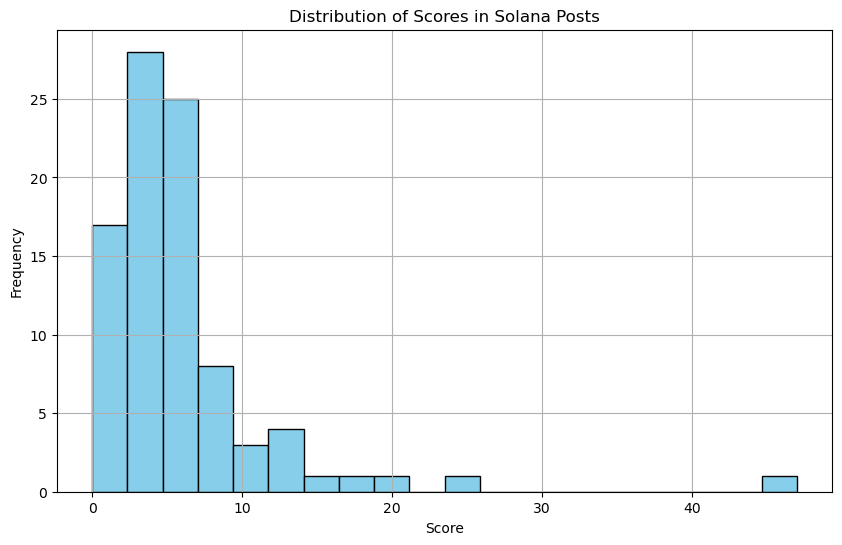

In [18]:
plot_distribution(solana, 'ups', 'Distribution of Upvotes in Solana Posts')
plot_distribution(solana, 'score', 'Distribution of Scores in Solana Posts')

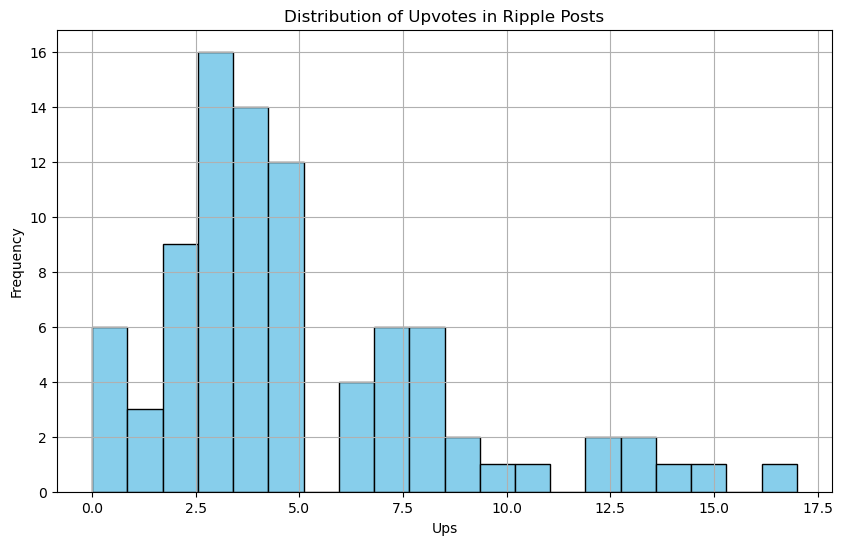

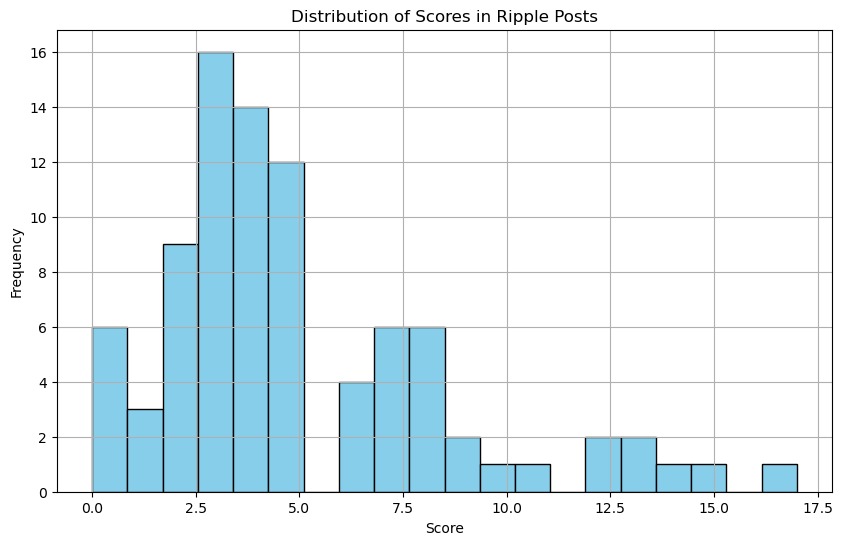

In [19]:

plot_distribution(ripple, 'ups', 'Distribution of Upvotes in Ripple Posts')
plot_distribution(ripple, 'score', 'Distribution of Scores in Ripple Posts')

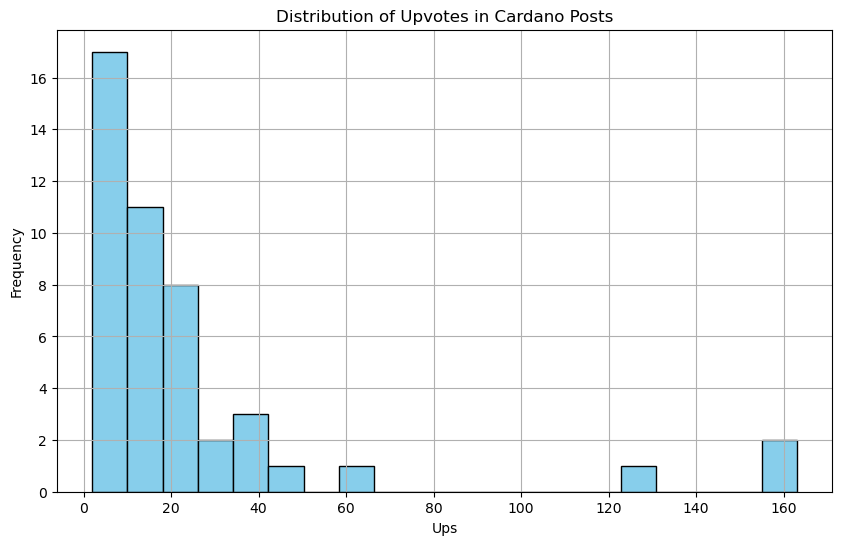

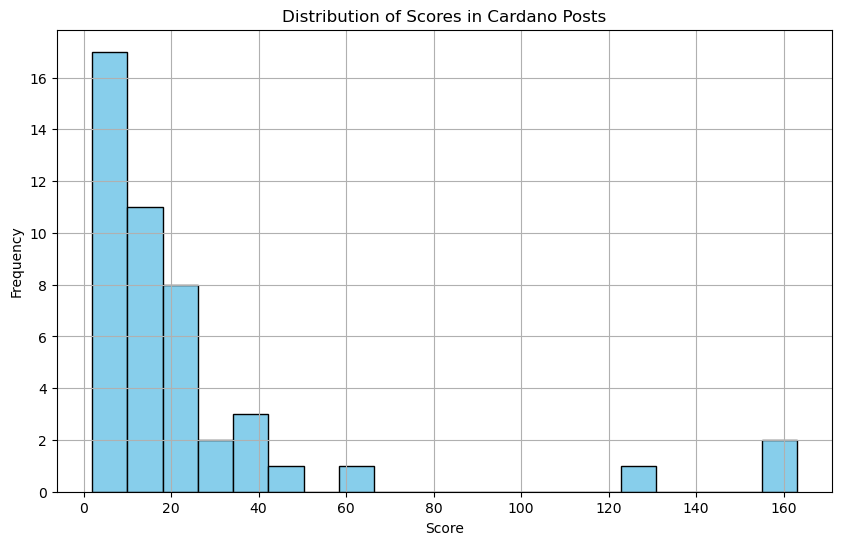

In [20]:
plot_distribution(cardano, 'ups', 'Distribution of Upvotes in Cardano Posts')
plot_distribution(cardano, 'score', 'Distribution of Scores in Cardano Posts')

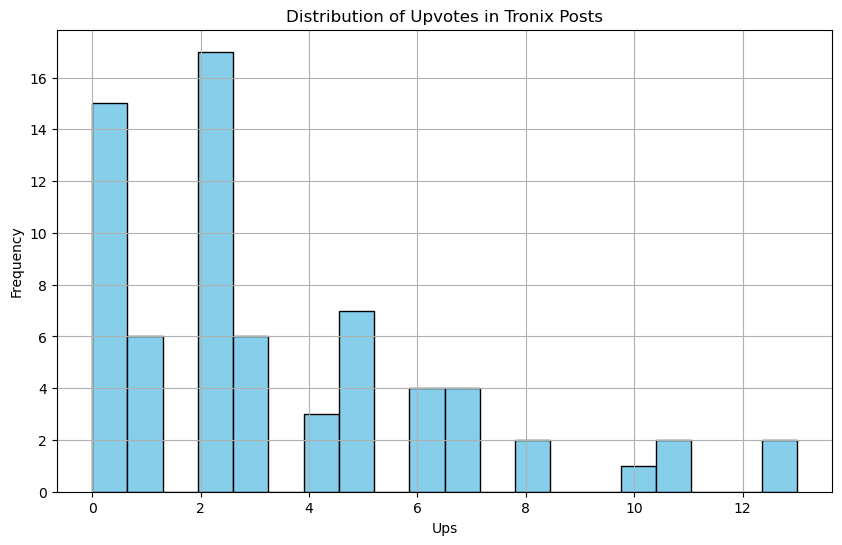

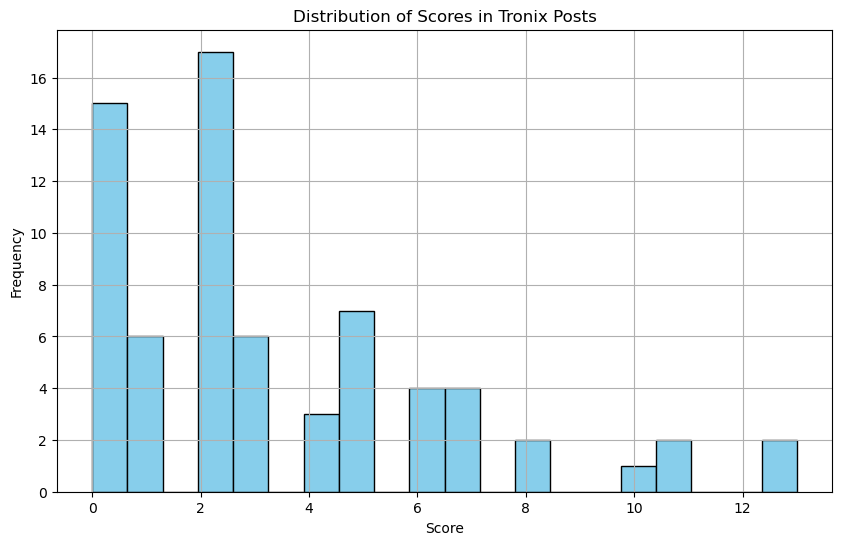

In [21]:
plot_distribution(tronix, 'ups', 'Distribution of Upvotes in Tronix Posts')
plot_distribution(tronix, 'score', 'Distribution of Scores in Tronix Posts')

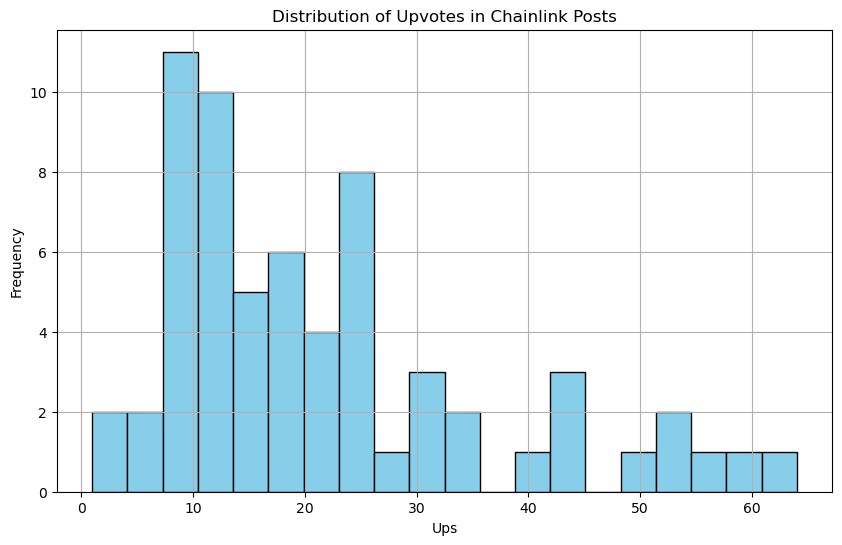

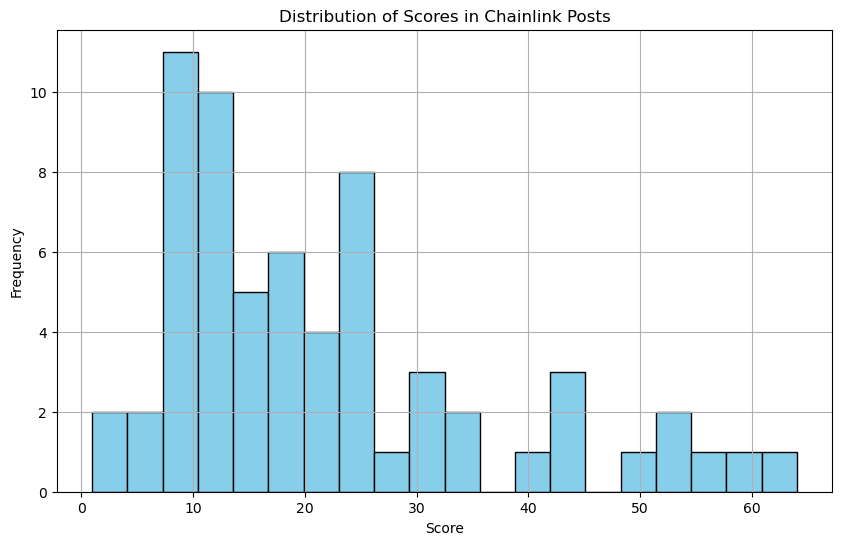

In [22]:
plot_distribution(chainlink, 'ups', 'Distribution of Upvotes in Chainlink Posts')
plot_distribution(chainlink, 'score', 'Distribution of Scores in Chainlink Posts')

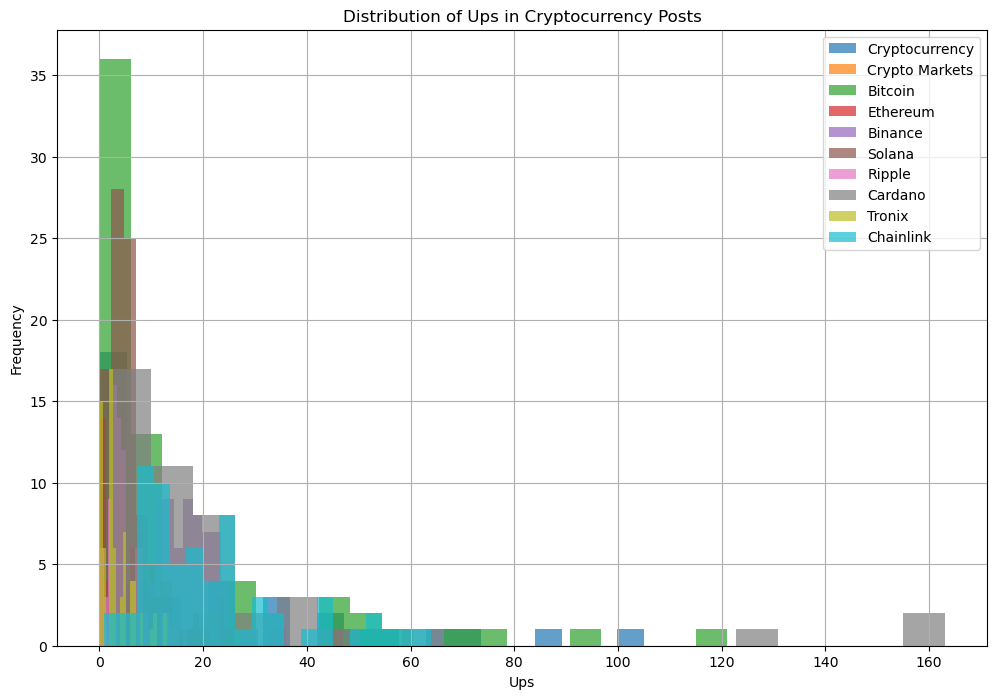

In [23]:
# Define a function to plot distribution for all cryptocurrencies
def plot_distribution_all(dataframes, column, title_prefix):
    plt.figure(figsize=(12, 8))
    for name, df in dataframes.items():
        plt.hist(df[column], bins=20, alpha=0.7, label=name)

    plt.title(f'Distribution of {column.capitalize()} in Cryptocurrency Posts')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distribution of upvotes and scores for all cryptocurrencies
plot_distribution_all({
    'Cryptocurrency': cryptocurrency,
    'Crypto Markets': cryptomarkets,
    'Bitcoin': bitcoin,
    'Ethereum': eth,
    'Binance': binance,
    'Solana': solana,
    'Ripple': ripple,
    'Cardano': cardano,
    'Tronix': tronix,
    'Chainlink': chainlink
}, 'ups', 'Distribution of Upvotes')


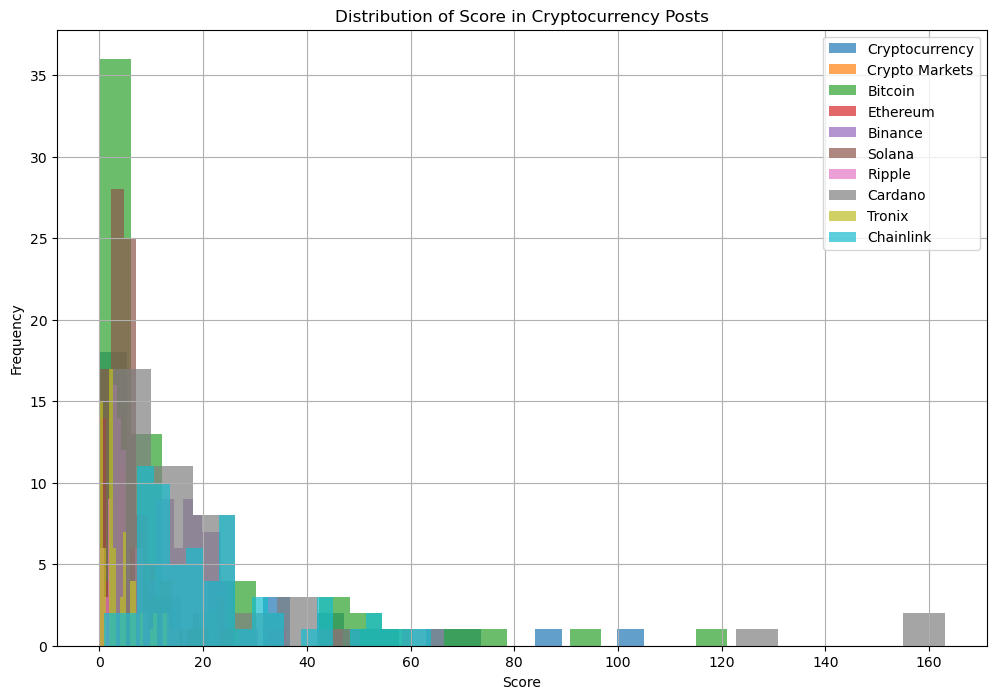

In [24]:
plot_distribution_all({
    'Cryptocurrency': cryptocurrency,
    'Crypto Markets': cryptomarkets,
    'Bitcoin': bitcoin,
    'Ethereum': eth,
    'Binance': binance,
    'Solana': solana,
    'Ripple': ripple,
    'Cardano': cardano,
    'Tronix': tronix,
    'Chainlink': chainlink
}, 'score', 'Distribution of Scores')

In [76]:
custom_stop_words = [
    'https','http', 'amp', 'gt', 'lt', 'x200b', 'btc', 'wallet', 'transaction', 'trx', 'solana',
    'ethereum', 'eth', 'cardano', 'ada', 'chainlink', 'ccip', 'lt', 'gt', 'xrp', 'xrpl',
    'yoroi', 'usdt', 'money', 'us', 'case', 'please', 'support', 'withdrawal',
    'help', 'id', 'user', 'users', 'one', 'new', 'use', 'like', 'would', 'time', 'discussion',
    'share', 'thread', 'blockchain', 'coin', 'know', 'projects', 'bitcoin', 'also',
    'im', 'think', 'something', 'way', '1', '2', '3', '4', '2024' ,'xrplounge',  'polysign', 'subs',  'ripplex', 'xaman'
]
# Function to expand stop words list
def expand_stop_words(stop_words_list):
    return stop_words_list + custom_stop_words

In [77]:

# Function to tokenize and remove stop words
def tokenize_and_remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(expand_stop_words(stopwords.words('english')))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return filtered_tokens

# Function to calculate word frequency for a DataFrame
def word_frequency(df, name):
    # Tokenize and remove stopwords for each post body
    tokenized_bodies = df['body'].apply(tokenize_and_remove_stopwords)
    # Flatten the list of tokenized words
    flattened_tokens = [word for sublist in tokenized_bodies for word in sublist]
    # Count the frequency of each word
    word_freq = Counter(flattened_tokens)
    # Sort the word frequency dictionary by frequency
    sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
    
    # Print the most common words
    print(f"Top 10 most common words in {name}:")
    for word, freq in list(sorted_word_freq.items())[:10]:
        print(f"{word}: {freq}")
    print()

# Perform word frequency analysis for each cryptocurrency
word_frequency(cryptocurrency, "Cryptocurrency")
word_frequency(cryptomarkets, "Crypto Markets")
word_frequency(bitcoin, "Bitcoin")
word_frequency(eth, "Ethereum")
word_frequency(binance, "Binance")
word_frequency(solana, "Solana")
word_frequency(ripple, "Ripple")
word_frequency(cardano, "Cardano")
word_frequency(tronix, "Tronix")
word_frequency(chainlink, "Chainlink")

Top 10 most common words in Cryptocurrency:
crypto: 57
top: 49
ten: 46
may: 27
threads: 26
information: 21
nbsp: 20
posts: 20
monthly: 20
portfolio: 20

Top 10 most common words in Crypto Markets:
crypto: 15
tokens: 8
niche: 7
pirate: 7
trading: 6
followers: 6
ai: 6
trump: 6
day: 5
transactions: 5

Top 10 most common words in Bitcoin:
want: 19
price: 18
people: 18
buy: 17
account: 14
could: 13
crypto: 13
units: 13
get: 12
value: 12

Top 10 most common words in Ethereum:
crypto: 29
platform: 18
network: 18
get: 17
still: 17
fee: 15
staking: 15
need: 14
using: 13
blobs: 13

Top 10 most common words in Binance:
issues: 390
provide: 325
chat: 325
account: 325
funds: 325
note: 260
click: 260
binance: 260
issue: 260
live: 260

Top 10 most common words in Solana:
sol: 36
wallets: 30
crypto: 25
need: 23
get: 22
token: 18
tokens: 18
account: 18
coins: 17
trying: 15

Top 10 most common words in Ripple:
discord: 114
nfts: 43
cryptocurrency: 41
following: 40
xumm: 40
news: 39
wallets: 39
protocol:

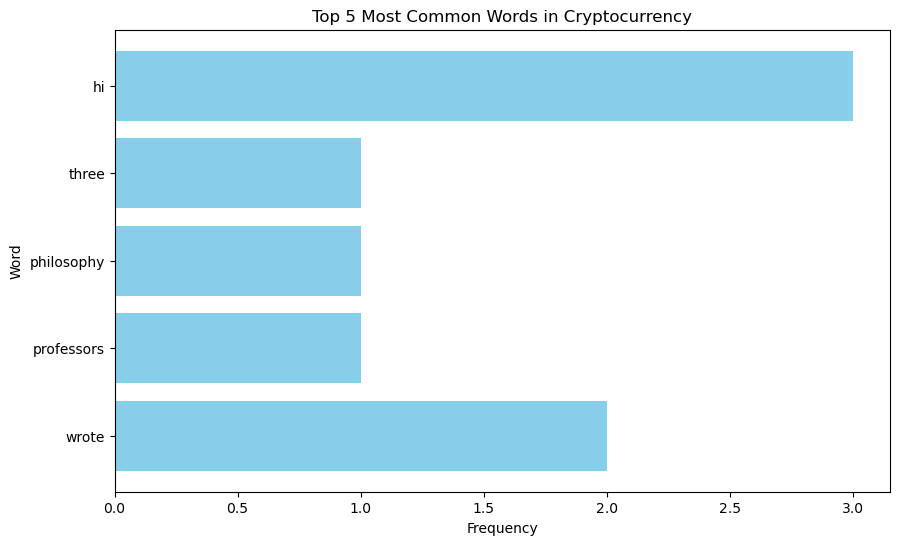

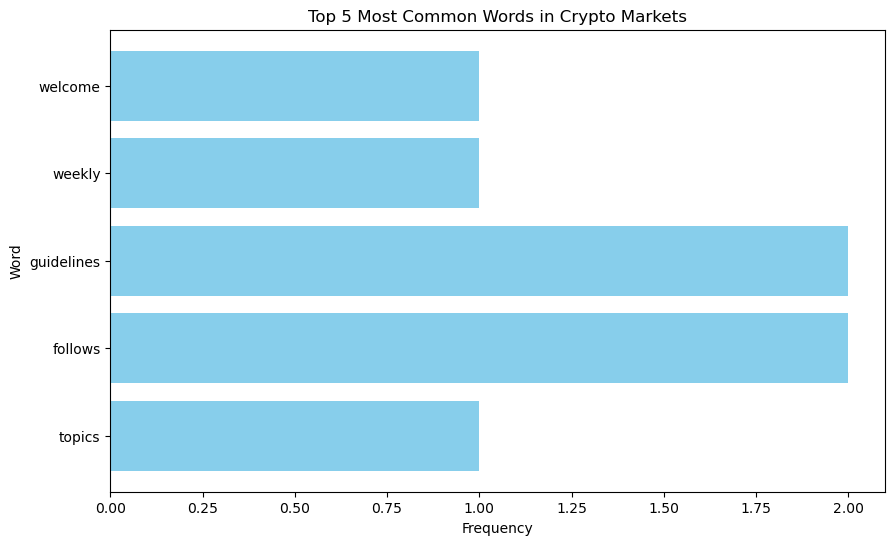

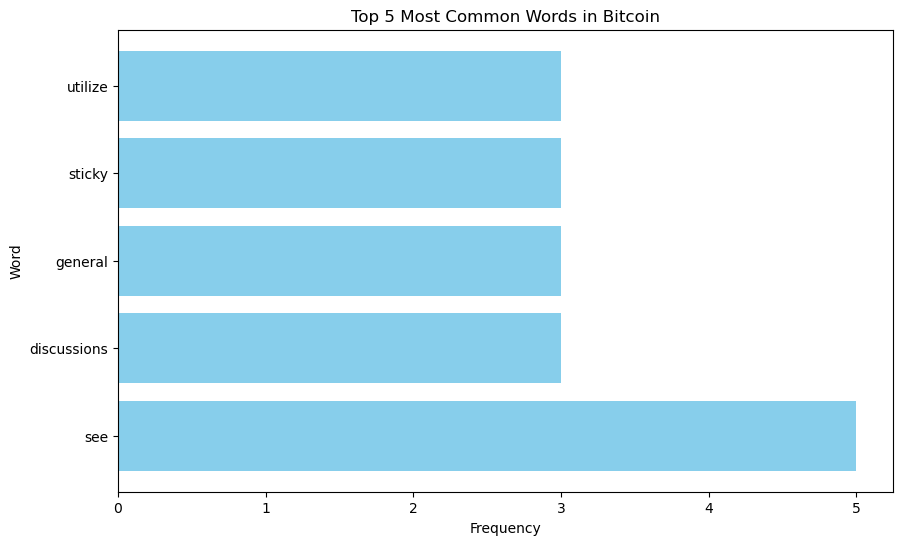

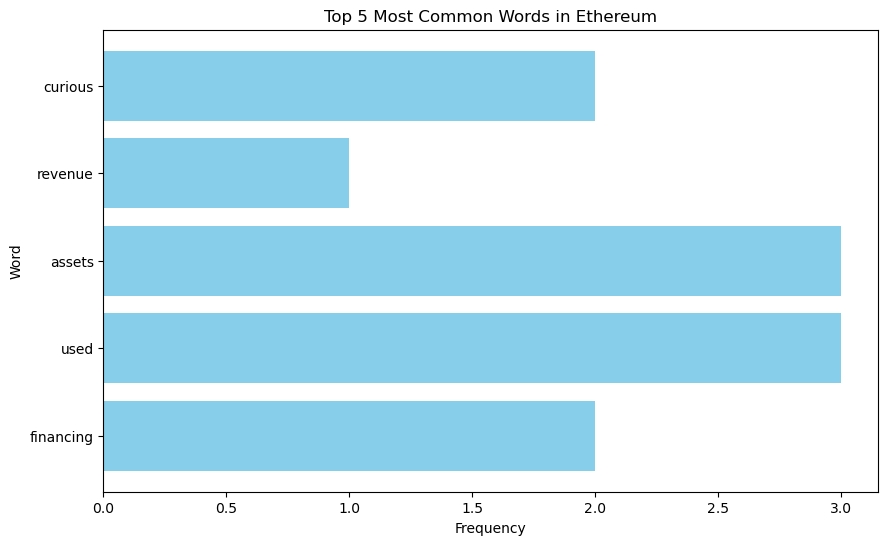

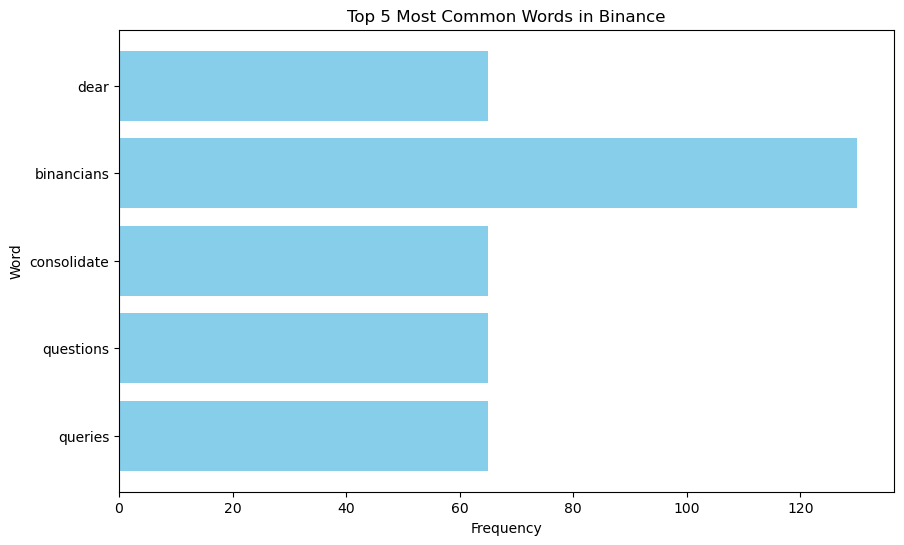

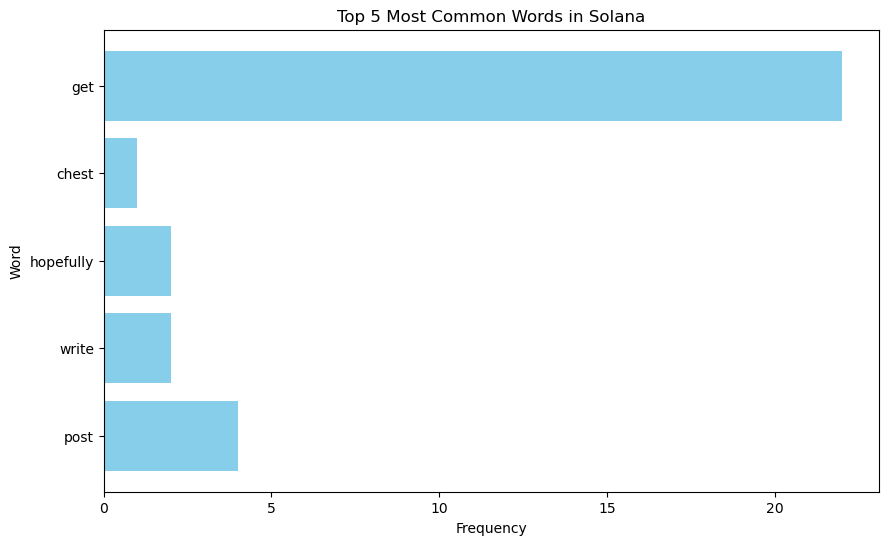

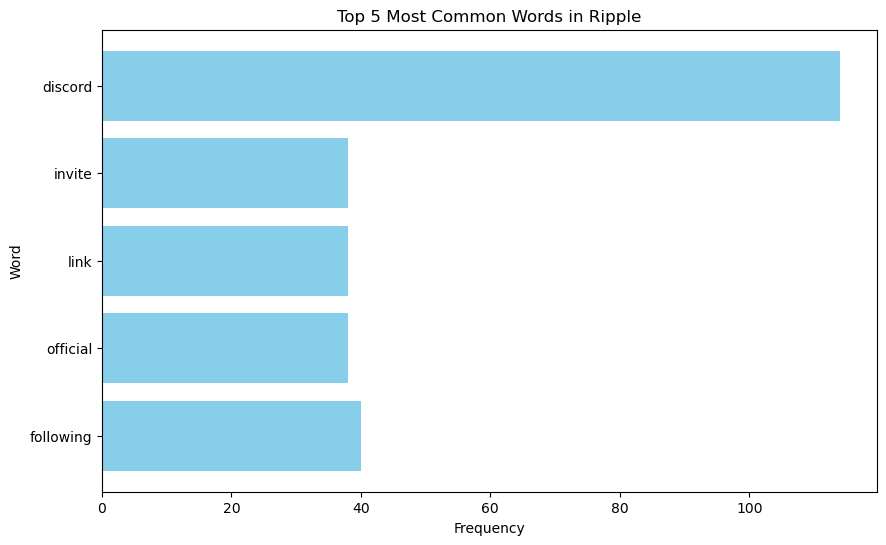

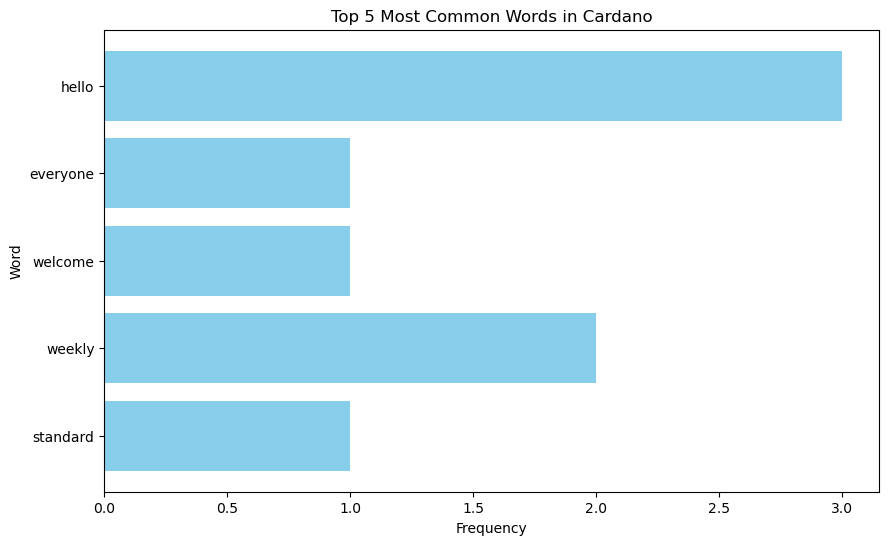

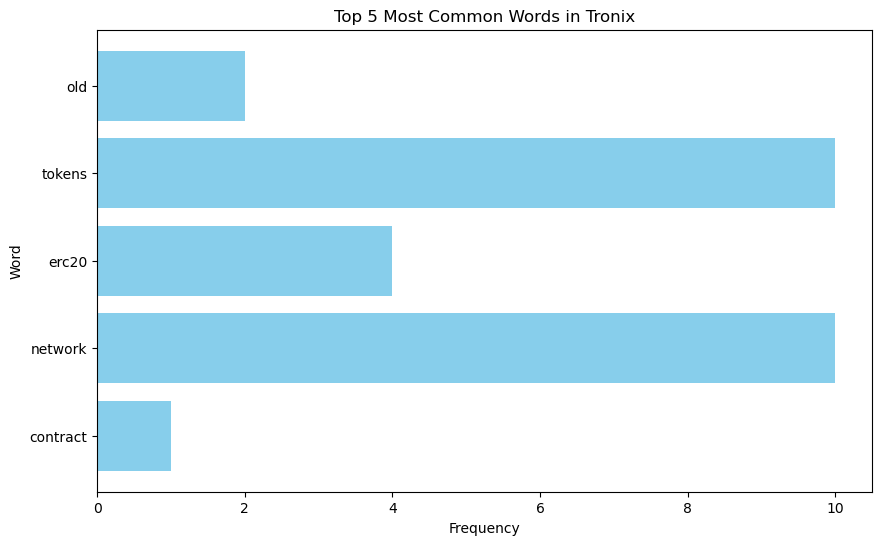

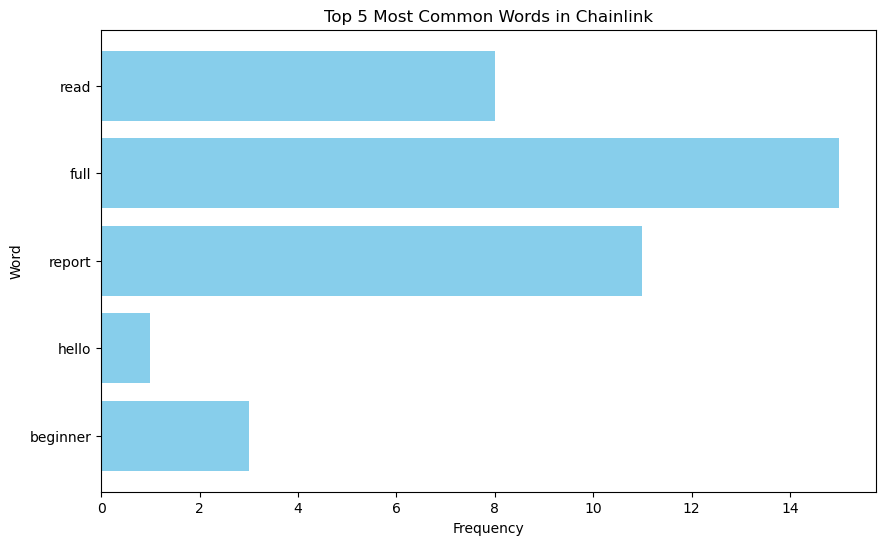

In [78]:
# Function to plot word frequency for the top N words
def plot_word_frequency(word_freq, name, top_n=5):
    top_words = list(word_freq.keys())[:top_n]
    top_freqs = list(word_freq.values())[:top_n]

    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_freqs, color='skyblue')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most common words at the top
    plt.title(f'Top {top_n} Most Common Words in {name}')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()
    
# Calculate word frequency for each cryptocurrency
word_freq_cryptocurrency = Counter(tokenize_and_remove_stopwords(" ".join(cryptocurrency['body'])))
word_freq_cryptomarkets = Counter(tokenize_and_remove_stopwords(" ".join(cryptomarkets['body'])))
word_freq_bitcoin = Counter(tokenize_and_remove_stopwords(" ".join(bitcoin['body'])))
word_freq_eth = Counter(tokenize_and_remove_stopwords(" ".join(eth['body'])))
word_freq_binance = Counter(tokenize_and_remove_stopwords(" ".join(binance['body'])))
word_freq_solana = Counter(tokenize_and_remove_stopwords(" ".join(solana['body'])))
word_freq_ripple = Counter(tokenize_and_remove_stopwords(" ".join(ripple['body'])))
word_freq_cardano = Counter(tokenize_and_remove_stopwords(" ".join(cardano['body'])))
word_freq_tronix = Counter(tokenize_and_remove_stopwords(" ".join(tronix['body'])))
word_freq_chainlink = Counter(tokenize_and_remove_stopwords(" ".join(chainlink['body'])))

# Plot top 5 word frequency for each cryptocurrency
plot_word_frequency(word_freq_cryptocurrency, "Cryptocurrency", top_n=5)
plot_word_frequency(word_freq_cryptomarkets, "Crypto Markets", top_n=5)
plot_word_frequency(word_freq_bitcoin, "Bitcoin", top_n=5)
plot_word_frequency(word_freq_eth, "Ethereum", top_n=5)
plot_word_frequency(word_freq_binance, "Binance", top_n=5)
plot_word_frequency(word_freq_solana, "Solana", top_n=5)
plot_word_frequency(word_freq_ripple, "Ripple", top_n=5)
plot_word_frequency(word_freq_cardano, "Cardano", top_n=5)
plot_word_frequency(word_freq_tronix, "Tronix", top_n=5)
plot_word_frequency(word_freq_chainlink, "Chainlink", top_n=5)


In [79]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores for each post body
def calculate_sentiment_scores(df):
    sentiment_scores = df['body'].apply(lambda x: analyzer.polarity_scores(x))
    return sentiment_scores

# Calculate sentiment scores for each cryptocurrency
sentiment_scores_cryptocurrency = calculate_sentiment_scores(cryptocurrency)
sentiment_scores_cryptomarkets = calculate_sentiment_scores(cryptomarkets)
sentiment_scores_bitcoin = calculate_sentiment_scores(bitcoin)
sentiment_scores_eth = calculate_sentiment_scores(eth)
sentiment_scores_binance = calculate_sentiment_scores(binance)
sentiment_scores_solana = calculate_sentiment_scores(solana)
sentiment_scores_ripple = calculate_sentiment_scores(ripple)
sentiment_scores_cardano = calculate_sentiment_scores(cardano)
sentiment_scores_tronix = calculate_sentiment_scores(tronix)
sentiment_scores_chainlink = calculate_sentiment_scores(chainlink)

# Function to summarize sentiment scores
def summarize_sentiment_scores(sentiment_scores, name):
    positive_count = sum(1 for score in sentiment_scores if score['compound'] > 0)
    neutral_count = sum(1 for score in sentiment_scores if score['compound'] == 0)
    negative_count = sum(1 for score in sentiment_scores if score['compound'] < 0)
    total_count = len(sentiment_scores)

    print(f"Sentiment Analysis for {name}:")
    print(f"Positive: {positive_count}/{total_count} ({(positive_count/total_count)*100:.2f}%)")
    print(f"Neutral: {neutral_count}/{total_count} ({(neutral_count/total_count)*100:.2f}%)")
    print(f"Negative: {negative_count}/{total_count} ({(negative_count/total_count)*100:.2f}%)")

# Summarize sentiment scores for each cryptocurrency
summarize_sentiment_scores(sentiment_scores_cryptocurrency, "Cryptocurrency")
summarize_sentiment_scores(sentiment_scores_cryptomarkets, "Crypto Markets")
summarize_sentiment_scores(sentiment_scores_bitcoin, "Bitcoin")
summarize_sentiment_scores(sentiment_scores_eth, "Ethereum")
summarize_sentiment_scores(sentiment_scores_binance, "Binance")
summarize_sentiment_scores(sentiment_scores_solana, "Solana")
summarize_sentiment_scores(sentiment_scores_ripple, "Ripple")
summarize_sentiment_scores(sentiment_scores_cardano, "Cardano")
summarize_sentiment_scores(sentiment_scores_tronix, "Tronix")
summarize_sentiment_scores(sentiment_scores_chainlink, "Chainlink")

Sentiment Analysis for Cryptocurrency:
Positive: 33/40 (82.50%)
Neutral: 2/40 (5.00%)
Negative: 5/40 (12.50%)
Sentiment Analysis for Crypto Markets:
Positive: 26/31 (83.87%)
Neutral: 1/31 (3.23%)
Negative: 4/31 (12.90%)
Sentiment Analysis for Bitcoin:
Positive: 42/65 (64.62%)
Neutral: 6/65 (9.23%)
Negative: 17/65 (26.15%)
Sentiment Analysis for Ethereum:
Positive: 56/69 (81.16%)
Neutral: 4/69 (5.80%)
Negative: 9/69 (13.04%)
Sentiment Analysis for Binance:
Positive: 65/83 (78.31%)
Neutral: 0/83 (0.00%)
Negative: 18/83 (21.69%)
Sentiment Analysis for Solana:
Positive: 59/90 (65.56%)
Neutral: 11/90 (12.22%)
Negative: 20/90 (22.22%)
Sentiment Analysis for Ripple:
Positive: 33/87 (37.93%)
Neutral: 11/87 (12.64%)
Negative: 43/87 (49.43%)
Sentiment Analysis for Cardano:
Positive: 38/46 (82.61%)
Neutral: 3/46 (6.52%)
Negative: 5/46 (10.87%)
Sentiment Analysis for Tronix:
Positive: 40/69 (57.97%)
Neutral: 9/69 (13.04%)
Negative: 20/69 (28.99%)
Sentiment Analysis for Chainlink:
Positive: 41/64 (

In [81]:
# Function to plot sentiment scores for a cryptocurrency
def plot_sentiment_scores(sentiment_scores, name):
    # Extract compound scores
    compound_scores = [score['compound'] for score in sentiment_scores]
    # Plot compound scores
    plt.figure(figsize=(10, 6))
    plt.plot(compound_scores, marker='o', linestyle='-', color='b')
    plt.title(f'Sentiment Analysis for {name}')
    plt.xlabel('Post')
    plt.ylabel('Compound Sentiment Score')
    plt.grid(True)
    plt.show()

# # Plot sentiment scores for each cryptocurrency
# plot_sentiment_scores(sentiment_scores_cryptocurrency, "Cryptocurrency")
# plot_sentiment_scores(sentiment_scores_cryptomarkets, "Crypto Markets")
# plot_sentiment_scores(sentiment_scores_bitcoin, "Bitcoin")
# plot_sentiment_scores(sentiment_scores_eth, "Ethereum")
# plot_sentiment_scores(sentiment_scores_binance, "Binance")
# plot_sentiment_scores(sentiment_scores_solana, "Solana")
# plot_sentiment_scores(sentiment_scores_ripple, "Ripple")
# plot_sentiment_scores(sentiment_scores_cardano, "Cardano")
# plot_sentiment_scores(sentiment_scores_tronix, "Tronix")
# plot_sentiment_scores(sentiment_scores_chainlink, "Chainlink")

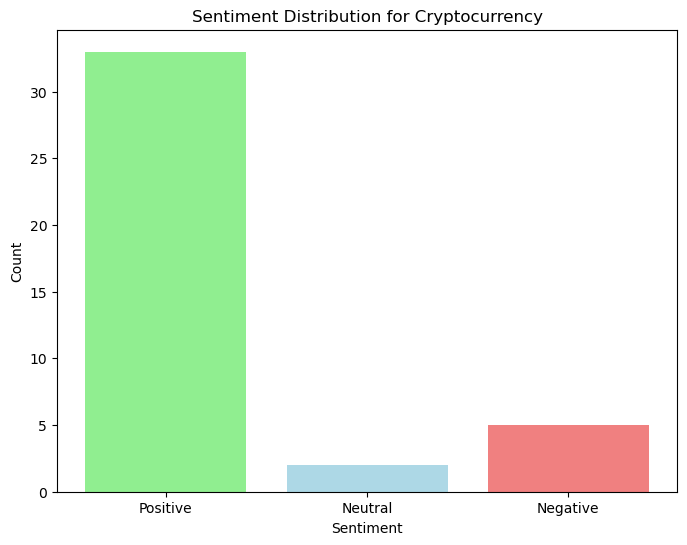

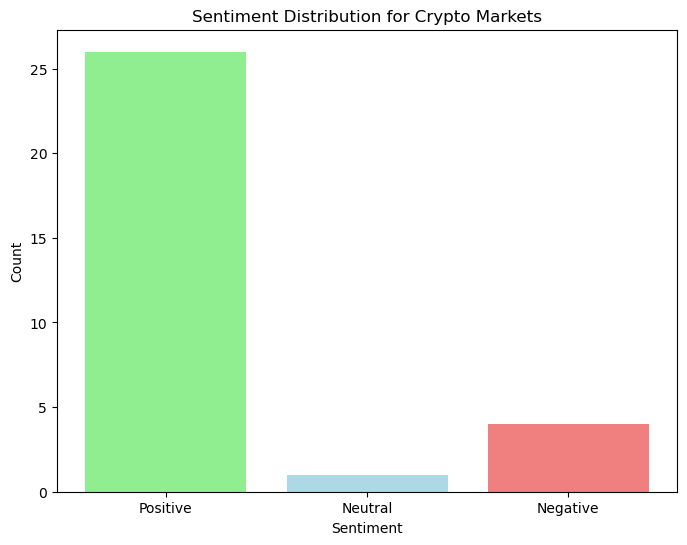

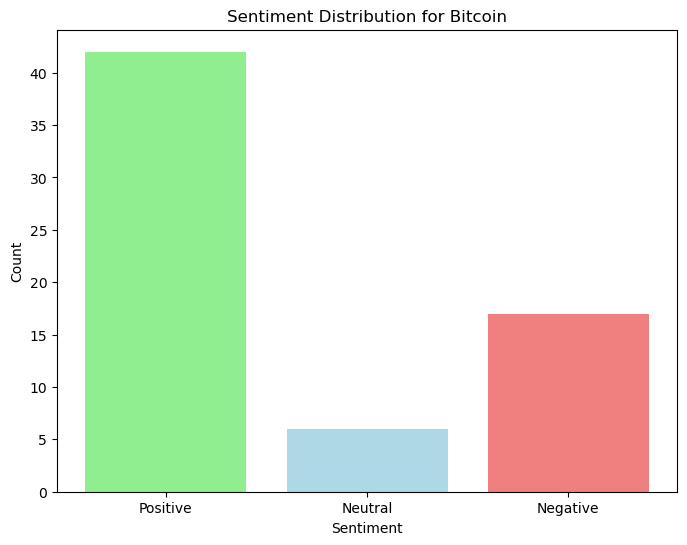

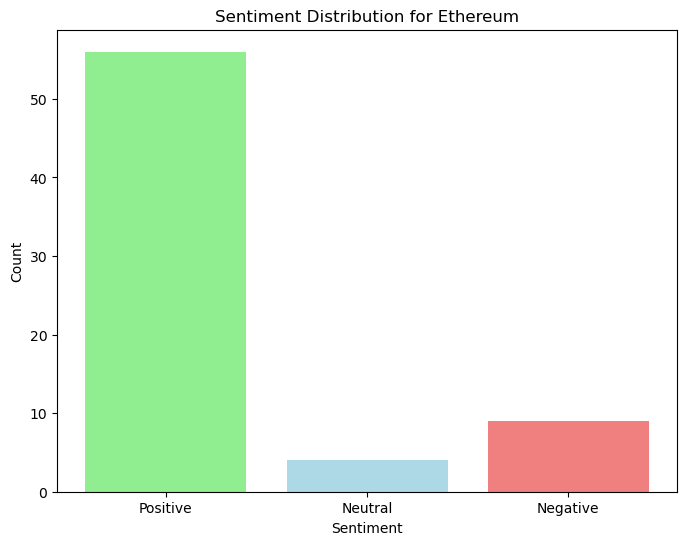

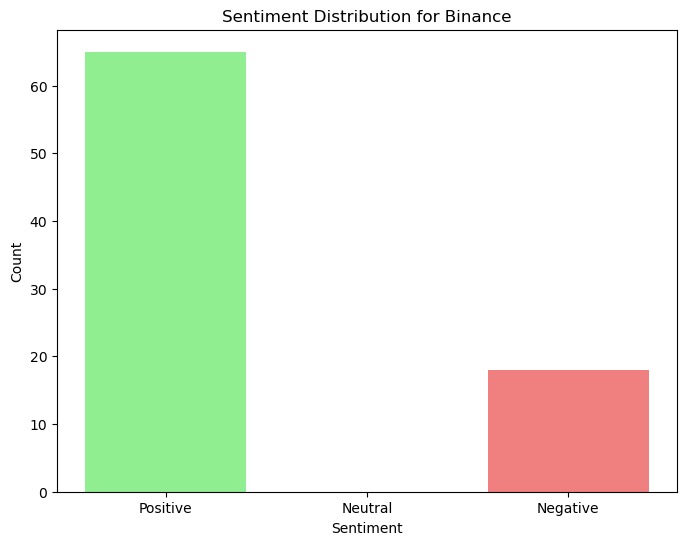

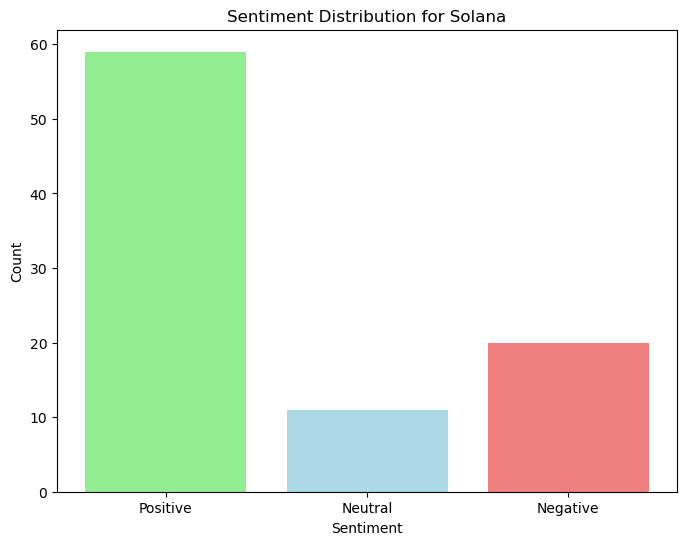

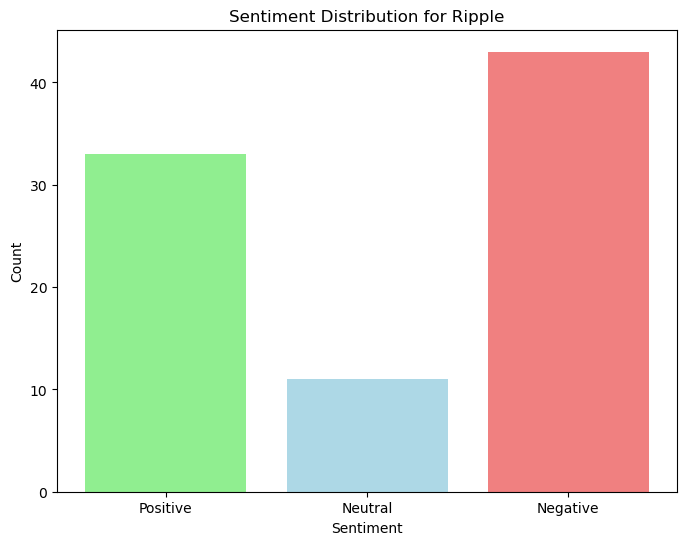

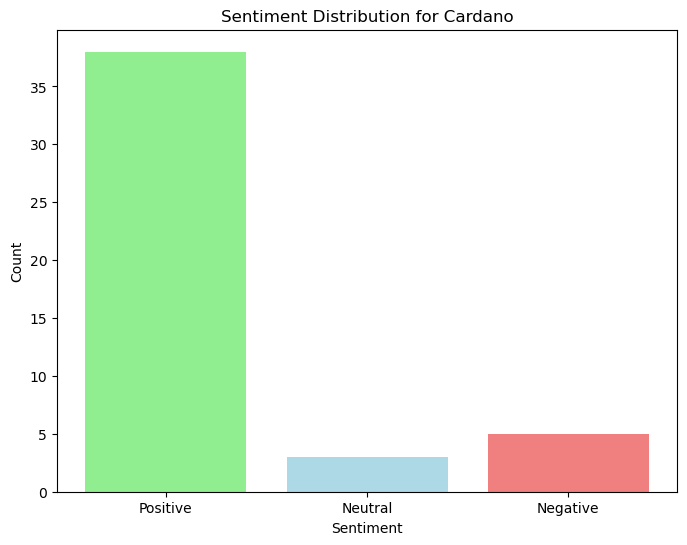

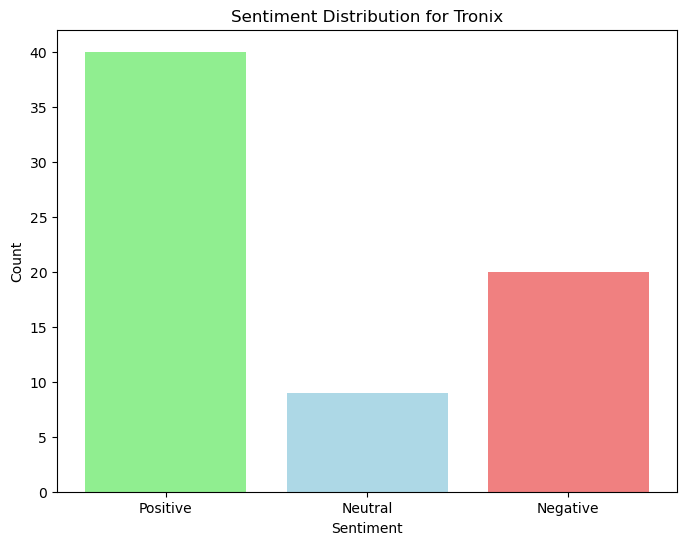

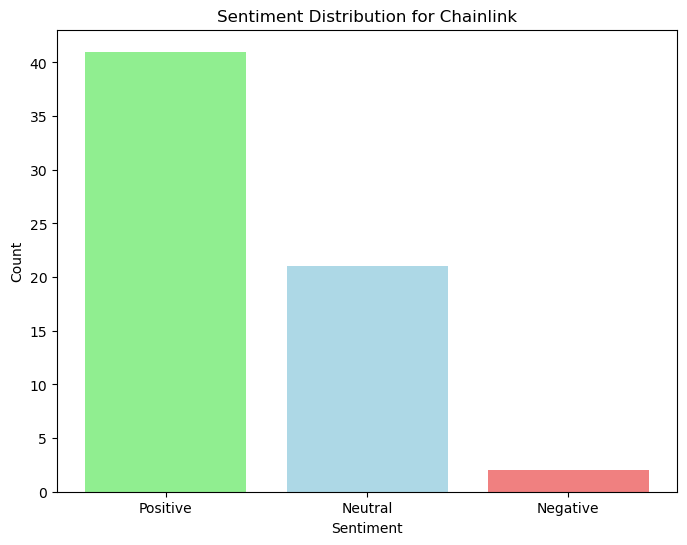

In [82]:
# Function to plot sentiment distribution for a cryptocurrency
def plot_sentiment_distribution(sentiment_scores, name):
    # Initialize counts
    positive_count = sum(1 for score in sentiment_scores if score['compound'] > 0)
    neutral_count = sum(1 for score in sentiment_scores if score['compound'] == 0)
    negative_count = sum(1 for score in sentiment_scores if score['compound'] < 0)
    
    # Plot
    labels = ['Positive', 'Neutral', 'Negative']
    counts = [positive_count, neutral_count, negative_count]
    colors = ['lightgreen', 'lightblue', 'lightcoral']

    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=colors)
    plt.title(f'Sentiment Distribution for {name}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# Plot sentiment distribution for each cryptocurrency
plot_sentiment_distribution(sentiment_scores_cryptocurrency, "Cryptocurrency")
plot_sentiment_distribution(sentiment_scores_cryptomarkets, "Crypto Markets")
plot_sentiment_distribution(sentiment_scores_bitcoin, "Bitcoin")
plot_sentiment_distribution(sentiment_scores_eth, "Ethereum")
plot_sentiment_distribution(sentiment_scores_binance, "Binance")
plot_sentiment_distribution(sentiment_scores_solana, "Solana")
plot_sentiment_distribution(sentiment_scores_ripple, "Ripple")
plot_sentiment_distribution(sentiment_scores_cardano, "Cardano")
plot_sentiment_distribution(sentiment_scores_tronix, "Tronix")
plot_sentiment_distribution(sentiment_scores_chainlink, "Chainlink")

### Combining the Data

In [31]:
# we will remove it later 
# cryptocurrency = reddit_api.get_crypto_curr_data()
# cryptomarkets = reddit_api.get_crypto_markets_data()
# bitcoin = reddit_api.get_bitcoin_data()
# eth= reddit_api.get_eth_data()
# binance = reddit_api.get_binance_data()
# solana = reddit_api.get_solana_data()
# ripple = reddit_api.get_ripple_data()
# cardano = reddit_api.get_cardano_data()
# tronix = reddit_api.get_tronix_data()
# chainlink = reddit_api.get_chainlink_data()

In [83]:
combined_df = pd.concat([cryptocurrency,cryptomarkets,bitcoin,
                             eth, binance, solana,
                             ripple,cardano, tronix,chainlink
                              ], axis=0)
combined_df.head(5)

,thread_id,subreddit,title,body,upvote_ratio,ups,downs,score
0,t3 _ 1ddq3hq,CryptoCurrency,We're the authors of Resistance Money: A Philo...,Hi r/cryptocurrency! We -- u/wrathius and u/ny...,0.65,34,0,34
1,t3 _ 1dg502i,CryptoCurrency,"Daily Crypto Discussion - June 15, 2024 (GMT+0)",**Welcome to the Daily Crypto Discussion threa...,0.84,15,0,15
2,t3 _ 1dg6xog,CryptoCurrency,Hedera has removed community runnable nodes fr...,I want to preface by saying I think Hedera is ...,0.85,45,0,45
5,t3 _ 1dfxwz1,CryptoCurrency,"$300M USDC was just minted on Algorand, immedi...","Earlier today, an unknown wallet minted $300M ...",0.81,105,0,105
7,t3 _ 1dg5qum,CryptoCurrency,Michael Saylor’s 21 Rules of Bitcoin,1. **Those who understand Bitcoin buy Bitcoin....,0.60,23,0,23


In [33]:
# combined_df["cleaned_body"] = combined_df['body'].apply(tokenize_and_remove_stopwords)
#     # Flatten the list of tokenized words
# #flattened_tokens = [word for sublist in tokenized_bodies for word in sublist]
# combined_df.head(5)

In [84]:
combined_df['combined_text'] = combined_df['body'] + ' ' + combined_df['title']

In [85]:
# List of columns to clean
# columns_to_clean = ['body', 'title', 'thread_id']
columns_to_clean = ["combined_text", 'body', 'title', 'thread_id']

# Apply the cleaning function to each column and create new cleaned columns
for col in columns_to_clean:
    combined_df[f'cleaned_{col}'] = combined_df[col].apply(tokenize_and_remove_stopwords)
    
combined_df

,thread_id,subreddit,title,body,upvote_ratio,ups,downs,score,combined_text,cleaned_combined_text,cleaned_body,cleaned_title,cleaned_thread_id
0,t3 _ 1ddq3hq,CryptoCurrency,We're the authors of Resistance Money: A Philo...,Hi r/cryptocurrency! We -- u/wrathius and u/ny...,0.65,34,0,34,Hi r/cryptocurrency! We -- u/wrathius and u/ny...,"[hi, three, philosophy, professors, wrote, aca...","[hi, three, philosophy, professors, wrote, aca...","[authors, resistance, philosophical, releasing...","[t3, 1ddq3hq]"
1,t3 _ 1dg502i,CryptoCurrency,"Daily Crypto Discussion - June 15, 2024 (GMT+0)",**Welcome to the Daily Crypto Discussion threa...,0.84,15,0,15,**Welcome to the Daily Crypto Discussion threa...,"[welcome, daily, crypto, read, disclaimer, rul...","[welcome, daily, crypto, read, disclaimer, rul...","[daily, crypto, june, 15]","[t3, 1dg502i]"
2,t3 _ 1dg6xog,CryptoCurrency,Hedera has removed community runnable nodes fr...,I want to preface by saying I think Hedera is ...,0.85,45,0,45,I want to preface by saying I think Hedera is ...,"[want, preface, saying, hedera, interesting, t...","[want, preface, saying, hedera, interesting, t...","[hedera, removed, community, runnable, nodes, ...","[t3, 1dg6xog]"
5,t3 _ 1dfxwz1,CryptoCurrency,"$300M USDC was just minted on Algorand, immedi...","Earlier today, an unknown wallet minted $300M ...",0.81,105,0,105,"Earlier today, an unknown wallet minted $300M ...","[earlier, today, unknown, minted, 300m, worth,...","[earlier, today, unknown, minted, 300m, worth,...","[300m, usdc, minted, algorand, immediately, pu...","[t3, 1dfxwz1]"
7,t3 _ 1dg5qum,CryptoCurrency,Michael Saylor’s 21 Rules of Bitcoin,1. **Those who understand Bitcoin buy Bitcoin....,0.60,23,0,23,1. **Those who understand Bitcoin buy Bitcoin....,"[understand, buy, criticize, everyone, grasp, ...","[understand, buy, criticize, everyone, grasp, ...","[michael, saylor, 21, rules]","[t3, 1dg5qum]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,t3 _ 1c4gx1v,Chainlink,Gamify ordinary processes and enable individua...,\nChainlink oracle networks power top blockcha...,0.84,8,0,8,\nChainlink oracle networks power top blockcha...,"[oracle, networks, power, top, gaming, applica...","[oracle, networks, power, top, gaming, applica...","[gamify, ordinary, processes, enable, individu...","[t3, 1c4gx1v]"
96,t3 _ 1c3nz5x,Chainlink,Chainlink Economics 2.0 is a multi-pronged ini...,\nChainlink Economics 2.0 represents a new era...,0.94,25,0,25,\nChainlink Economics 2.0 represents a new era...,"[economics, represents, era, sustainable, grow...","[economics, represents, era, sustainable, grow...","[economics, initiative, create, virtuous, cycl...","[t3, 1c3nz5x]"
97,t3 _ 1c2typm,Chainlink,Transporter is an intuitive web application fo...,\nUsers are now able to bridge supported token...,0.93,23,0,23,\nUsers are now able to bridge supported token...,"[able, bridge, supported, tokens, including, u...","[able, bridge, supported, tokens, including, u...","[transporter, intuitive, web, application, cry...","[t3, 1c2typm]"
98,t3 _ 1c2hh1z,Chainlink,Register for Chainlink’s Block Magic Hackathon...,"\nAt the Block Magic Hackathon, we believe tha...",0.92,9,0,9,"\nAt the Block Magic Hackathon, we believe tha...","[block, magic, hackathon, believe, innovation,...","[block, magic, hackathon, believe, innovation,...","[register, block, magic, hackathon, become, on...","[t3, 1c2hh1z]"


In [86]:
combined_df = combined_df.drop(columns= ['title', 'body', 'thread_id'])   


# Combine relevant text columns

# Display the first 5 rows of the updated DataFrame
combined_df.head()




,subreddit,upvote_ratio,ups,downs,score,combined_text,cleaned_combined_text,cleaned_body,cleaned_title,cleaned_thread_id
0,CryptoCurrency,0.65,34,0,34,Hi r/cryptocurrency! We -- u/wrathius and u/ny...,"[hi, three, philosophy, professors, wrote, aca...","[hi, three, philosophy, professors, wrote, aca...","[authors, resistance, philosophical, releasing...","[t3, 1ddq3hq]"
1,CryptoCurrency,0.84,15,0,15,**Welcome to the Daily Crypto Discussion threa...,"[welcome, daily, crypto, read, disclaimer, rul...","[welcome, daily, crypto, read, disclaimer, rul...","[daily, crypto, june, 15]","[t3, 1dg502i]"
2,CryptoCurrency,0.85,45,0,45,I want to preface by saying I think Hedera is ...,"[want, preface, saying, hedera, interesting, t...","[want, preface, saying, hedera, interesting, t...","[hedera, removed, community, runnable, nodes, ...","[t3, 1dg6xog]"
5,CryptoCurrency,0.81,105,0,105,"Earlier today, an unknown wallet minted $300M ...","[earlier, today, unknown, minted, 300m, worth,...","[earlier, today, unknown, minted, 300m, worth,...","[300m, usdc, minted, algorand, immediately, pu...","[t3, 1dfxwz1]"
7,CryptoCurrency,0.60,23,0,23,1. **Those who understand Bitcoin buy Bitcoin....,"[understand, buy, criticize, everyone, grasp, ...","[understand, buy, criticize, everyone, grasp, ...","[michael, saylor, 21, rules]","[t3, 1dg5qum]"


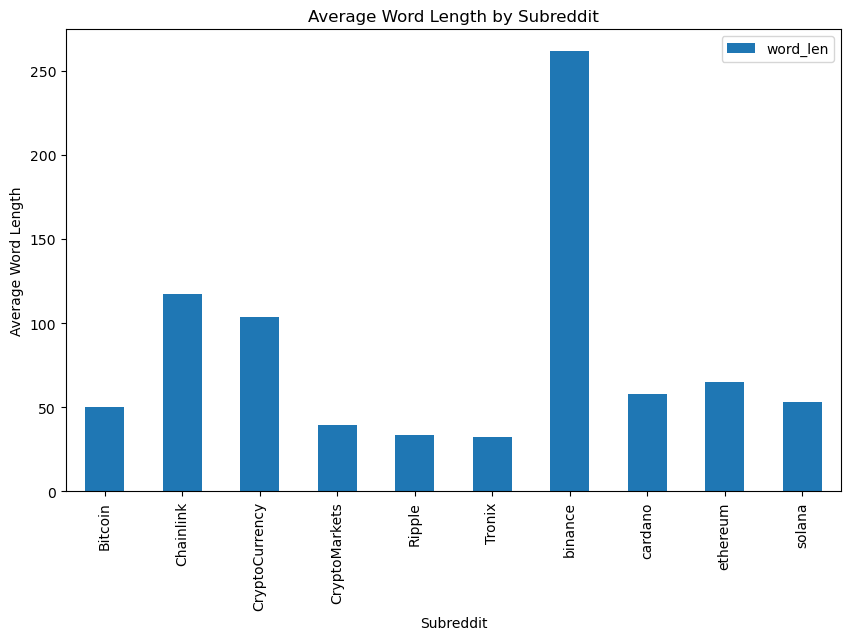

In [89]:
# Mirna Adjusted it *********
# Join the tokens in the 'cleaned_combined_text' column back into strings
combined_df['cleaned_combined_text_str'] = combined_df['cleaned_combined_text'].apply(lambda x: ' '.join(x))

# Calculate the word length
combined_df['word_len'] = combined_df['cleaned_combined_text_str'].apply(lambda x: len(x.split()))

# Plot the average word length by subreddit
combined_df.groupby('subreddit').agg({'word_len': 'mean'}).plot.bar(figsize=(10,6))
plt.xlabel('Subreddit')
plt.ylabel('Average Word Length')
plt.title('Average Word Length by Subreddit')
plt.show()

In [38]:
# # Join the tokens in the 'cleaned_body' column back into strings
# combined_df['cleaned_body_str'] = combined_df['cleaned_body'].apply(lambda x: ' '.join(x))

# # Calculate the word length
# combined_df['word_len'] = combined_df['cleaned_body_str'].apply(lambda x: len(x.split()))

# # Plot the average word length by subreddit
# combined_df.groupby('subreddit').agg({'word_len': 'mean'}).plot.bar(figsize=(10,6))
# plt.xlabel('Subreddit')
# plt.ylabel('Average Word Length')
# plt.title('Average Word Length by Subreddit')
# plt.show()


In [91]:
def descriptive_stats(tokens, verbose=False):
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0
    num_characters = sum(len(token) for token in tokens)
    
    if verbose:
        return num_tokens, num_unique_tokens, lexical_diversity, num_characters
    else:
        return num_unique_tokens, lexical_diversity, num_characters



# Process each text and calculate descriptive statistics
for text in combined_df['cleaned_combined_text']:
    try:
        tokens = text
        stats_verbose_true = descriptive_stats(tokens, verbose=True)
        stats_verbose_false = descriptive_stats(tokens, verbose=False)
        
        expected_num_tokens = len(tokens)
        expected_num_unique_tokens = len(set(tokens))
        expected_lexical_diversity = len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0
        expected_num_characters = sum(len(token) for token in tokens)
        
        assert(stats_verbose_true[0] == expected_num_tokens)
        assert(stats_verbose_false[0] == expected_num_unique_tokens)
        assert(abs(stats_verbose_false[1] - expected_lexical_diversity) < 0.02)
        assert(stats_verbose_false[2] == expected_num_characters)
        
    except AssertionError:
        print(f"Assertion failed for text: {text}")
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")

# display the stats for the entire combined DataFrame
def display_combined_stats(df, column_name):
    combined_tokens = [token for tokens in df[column_name] for token in tokens]
    num_tokens, num_unique_tokens, lexical_diversity, num_characters = descriptive_stats(combined_tokens, verbose=True)
    
    print(f"Combined Statistics for {column_name}:")
    print(f"Total tokens: {num_tokens}")
    print(f"Unique tokens: {num_unique_tokens}")
    print(f"Lexical diversity: {lexical_diversity:.2f}")
    print(f"Total characters: {num_characters}")

display_combined_stats(combined_df, 'cleaned_combined_text')


Combined Statistics for cleaned_combined_text:
Total tokens: 54881
Unique tokens: 6659
Lexical diversity: 0.12
Total characters: 347594


## Defining the problem:
### Topic Modeling:

- Objective: Identify and understand the main topics discussed in cryptocurrency-related subreddits.
- Outcome: Discover latent topics and trends within the discussions, which could help in understanding community interests and sentiments.

#### Text Vectorization
We'll convert the cleaned text data into numerical vectors using TF-IDF and Count Vectorizer.

In [92]:
# Define stopwords
stop_words = list(stopwords.words('english'))

# Perform Count Vectorization
count_text_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(combined_df['cleaned_combined_text_str'])

# Perform TF-IDF Vectorization
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(combined_df['cleaned_combined_text_str'])

# Print the shape of the vectors
print("Count Vector Shape:", count_text_vectors.shape)
print("TF-IDF Vector Shape:", tfidf_text_vectors.shape)

Count Vector Shape: (644, 1388)
TF-IDF Vector Shape: (644, 1388)


### Applying unsupervised learning models:
Apply NMF, LSA, and LDA Models

#### NMF Model

In [93]:
# Fit the NMF model
nmf_text_model = NMF(n_components=5, random_state=314)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

# Display topics
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 issues (1.76)
 chat (1.53)
 binance (1.49)
 provide (1.45)
 funds (1.39)

Topic 01
 discord (12.12)
 server (3.28)
 interledger (3.24)
 aids (3.24)
 boosters (3.24)

Topic 02
 drop (13.65)
 thoughts (13.22)
 daily (12.73)
 things (12.56)
 2023 (11.32)

Topic 03
 tron (0.83)
 buy (0.67)
 sol (0.66)
 crypto (0.64)
 anyone (0.61)

Topic 04
 data (1.12)
 tokenized (1.07)
 person (1.03)
 assets (0.99)
 build (0.81)


#### LSA Model

In [94]:
# Fit the LSA model
lsa_text_model = TruncatedSVD(n_components=5, random_state=314)
lsa_W_text_matrix = lsa_text_model.fit_transform(tfidf_text_vectors)
lsa_H_text_matrix = lsa_text_model.components_

# Display topics
display_topics(lsa_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 issues (1.58)
 chat (1.37)
 binance (1.35)
 provide (1.30)
 funds (1.27)

Topic 01
 discord (11.75)
 server (3.18)
 aids (3.14)
 boosters (3.14)
 interledger (3.14)

Topic 02
 drop (4.61)
 thoughts (4.52)
 daily (4.37)
 things (4.31)
 2023 (3.83)

Topic 03
 tron (0.58)
 crypto (0.55)
 token (0.52)
 network (0.50)
 price (0.49)

Topic 04
 tokenized (4.38)
 data (4.21)
 person (3.81)
 assets (3.80)
 sergey (3.10)


#### LDA Model

In [95]:
# Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
W_lda_matrix = lda_model.fit_transform(count_text_vectors)
H_lda_matrix = lda_model.components_

# Display topics
display_topics(lda_model, count_text_vectorizer.get_feature_names_out())


Topic 00
 issues (1.82)
 account (1.50)
 chat (1.50)
 binance (1.48)
 funds (1.48)

Topic 01
 data (0.81)
 person (0.76)
 may (0.75)
 community (0.68)
 assets (0.66)

Topic 02
 crypto (1.93)
 need (1.61)
 get (1.36)
 account (1.31)
 want (1.29)

Topic 03
 discord (3.98)
 wallets (1.73)
 cryptocurrency (1.45)
 top (1.44)
 protocol (1.29)

Topic 04
 posts (2.10)
 daily (1.79)
 threads (1.72)
 crypto (1.48)
 information (1.47)


### Visualize the LDA Model using pyLDAvis


In [96]:
# Create the count vectorizer and fit_transform on the text
count_vectorizer = CountVectorizer(stop_words='english')
count_vectors = count_vectorizer.fit_transform(combined_df['cleaned_combined_text_str'])

# Convert to gensim corpus
corpus = gensim.matutils.Sparse2Corpus(count_vectors, documents_columns=False)

# Create dictionary from count_vectorizer
id2word = gensim.corpora.Dictionary([count_vectorizer.get_feature_names_out()])

# Fit LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=id2word, passes=15, random_state=42)

# Visualize the topics
lda_display = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_display)

/Users/aryasmc/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/aryasmc/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/aryasmc/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/aryasmc/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/aryasmc/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires ver

### Model Evaluation and Comparison

In [97]:
# Compute coherence score for LDA
lda_coherence_model = CoherenceModel(model=lda_model, texts=combined_df['cleaned_combined_text'], dictionary=id2word, coherence='c_v')
lda_coherence = lda_coherence_model.get_coherence()
print(f'LDA Coherence Score: {lda_coherence}')


LDA Coherence Score: 0.5079559720528308


In [98]:
# Coherence Score for NMF Model
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

# Get top words for NMF model
nmf_top_words = get_top_words(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out(), 10)

# Create a dictionary and corpus based on the original texts
texts = combined_df['cleaned_combined_text'].apply(lambda x: x if isinstance(x, list) else x.split())
dictionary = gensim.corpora.Dictionary(texts)

# Compute coherence score for NMF model
nmf_coherence_model = CoherenceModel(topics=nmf_top_words, texts=texts, dictionary=dictionary, coherence='c_v')
nmf_coherence = nmf_coherence_model.get_coherence()
print(f'NMF Coherence Score: {nmf_coherence}')

NMF Coherence Score: 0.6636234883968717


In [99]:
# Coherence Score for LSA Model
# Get top words for LSA model
lsa_top_words = get_top_words(lsa_text_model, tfidf_text_vectorizer.get_feature_names_out(), 10)

# Compute coherence score for LSA model
lsa_coherence_model = CoherenceModel(topics=lsa_top_words, texts=texts, dictionary=dictionary, coherence='c_v')
lsa_coherence = lsa_coherence_model.get_coherence()
print(f'LSA Coherence Score: {lsa_coherence}')

LSA Coherence Score: 0.6661807881702358


In [100]:
# Create a DataFrame to display the coherence scores
coherence_scores = {
    'Model': ['LDA', 'NMF', 'LSA'],
    'Coherence Score': [round(lda_coherence, 2), round(nmf_coherence, 2), round(lsa_coherence, 2)]
}

coherence_df = pd.DataFrame(coherence_scores)

# Display the DataFrame
print(coherence_df)

  Model  Coherence Score
0   LDA             0.51
1   NMF             0.66
2   LSA             0.67


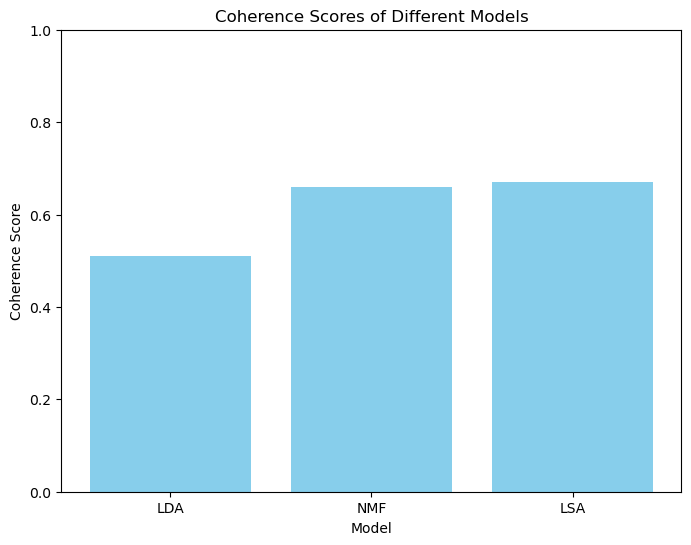

In [101]:
# Create a DataFrame to display the coherence scores
coherence_scores = {
    'Model': ['LDA', 'NMF', 'LSA'],
    'Coherence Score': [round(lda_coherence, 2), round(nmf_coherence, 2), round(lsa_coherence, 2)]
}

coherence_df = pd.DataFrame(coherence_scores)

# Plot the coherence scores
plt.figure(figsize=(8, 6))
plt.bar(coherence_df['Model'], coherence_df['Coherence Score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores of Different Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization
plt.show()

### Summary:
The analysis effectively uncovered and comprehended the main topics discussed in cryptocurrency-related subreddits. By applying NMF, LSA, and LDA models, we revealed latent topics and trends within the conversations. The coherence scores for each model were as follows: LDA achieved a coherence score of 0.54, NMF achieved a score of 0.682, and LSA achieved the highest score of 0.685. Notably, the LSA model demonstrated the most coherent and meaningful topics. These insights offer valuable understanding into the interests and sentiments of the cryptocurrency community, enhancing our grasp of the discourse within these subreddits.

## Hyper-Tuning

In [102]:
# Define an expanded parameter grid for NMF
param_grid_nmf_expanded = {
    'n_components': [2,5, 10],
    'alpha_W': [0.01, 0.05, 0.1, 0.5],
    'l1_ratio': [0.0, 0.1, 0.5, 0.9, 1.0]
}

# Convert the cleaned body text into tokens for coherence model
texts = combined_df['cleaned_combined_text'].apply(lambda x: x if isinstance(x, list) else x.split()).tolist()

# Create a Gensim dictionary
dictionary = Dictionary(texts)

# Function to evaluate coherence score
def evaluate_nmf(params, X, texts, dictionary, vectorizer):
    nmf_model = NMF(n_components=params['n_components'], alpha_W=params['alpha_W'], l1_ratio=params['l1_ratio'], random_state=42, max_iter=500)
    W = nmf_model.fit_transform(X)
    H = nmf_model.components_
    top_words = get_top_words(nmf_model, vectorizer.get_feature_names_out(), 10)
    coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Evaluate the expanded parameter grid
best_score_expanded = -1
best_params_expanded = None
for params in ParameterGrid(param_grid_nmf_expanded):
    score = evaluate_nmf(params, tfidf_text_vectors, texts, dictionary, tfidf_text_vectorizer)
    print(f"Parameters: {params}, Coherence Score: {score}")
    if score > best_score_expanded:
        best_score_expanded = score
        best_params_expanded = params

print(f"Best NMF Parameters (Expanded): {best_params_expanded}")
print(f"Best NMF Coherence Score (Expanded): {best_score_expanded}")


Parameters: {'alpha_W': 0.01, 'l1_ratio': 0.0, 'n_components': 2}, Coherence Score: 0.6093275240173636
Parameters: {'alpha_W': 0.01, 'l1_ratio': 0.0, 'n_components': 5}, Coherence Score: 0.6093275240173636
Parameters: {'alpha_W': 0.01, 'l1_ratio': 0.0, 'n_components': 10}, Coherence Score: 0.6093275240173635
Parameters: {'alpha_W': 0.01, 'l1_ratio': 0.1, 'n_components': 2}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.01, 'l1_ratio': 0.1, 'n_components': 5}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.01, 'l1_ratio': 0.1, 'n_components': 10}, Coherence Score: 0.45475665150716765
Parameters: {'alpha_W': 0.01, 'l1_ratio': 0.5, 'n_components': 2}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.01, 'l1_ratio': 0.5, 'n_components': 5}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.01, 'l1_ratio': 0.5, 'n_components': 10}, Coherence Score: 0.45475665150716765
Parameters: {'alpha_W': 0.01, 'l1_ratio': 0.9, 'n_components': 2}, C

/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.01, 'l1_ratio': 1.0, 'n_components': 2}, Coherence Score: 0.8018118338576188


/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.01, 'l1_ratio': 1.0, 'n_components': 5}, Coherence Score: 0.6661807881702358


/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.01, 'l1_ratio': 1.0, 'n_components': 10}, Coherence Score: 0.5785091739900329
Parameters: {'alpha_W': 0.05, 'l1_ratio': 0.0, 'n_components': 2}, Coherence Score: 0.8018118338576188
Parameters: {'alpha_W': 0.05, 'l1_ratio': 0.0, 'n_components': 5}, Coherence Score: 0.6863212479534657
Parameters: {'alpha_W': 0.05, 'l1_ratio': 0.0, 'n_components': 10}, Coherence Score: 0.6478243859854146
Parameters: {'alpha_W': 0.05, 'l1_ratio': 0.1, 'n_components': 2}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.05, 'l1_ratio': 0.1, 'n_components': 5}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.05, 'l1_ratio': 0.1, 'n_components': 10}, Coherence Score: 0.45475665150716765
Parameters: {'alpha_W': 0.05, 'l1_ratio': 0.5, 'n_components': 2}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.05, 'l1_ratio': 0.5, 'n_components': 5}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.05, 'l1_ratio': 0.5, 'n_components': 10}, C

/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.05, 'l1_ratio': 1.0, 'n_components': 2}, Coherence Score: 0.8018118338576188


/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.05, 'l1_ratio': 1.0, 'n_components': 5}, Coherence Score: 0.6661807881702358


/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.05, 'l1_ratio': 1.0, 'n_components': 10}, Coherence Score: 0.5785091739900329
Parameters: {'alpha_W': 0.1, 'l1_ratio': 0.0, 'n_components': 2}, Coherence Score: 0.8018118338576188
Parameters: {'alpha_W': 0.1, 'l1_ratio': 0.0, 'n_components': 5}, Coherence Score: 0.6863212479534657
Parameters: {'alpha_W': 0.1, 'l1_ratio': 0.0, 'n_components': 10}, Coherence Score: 0.6069358579511295
Parameters: {'alpha_W': 0.1, 'l1_ratio': 0.1, 'n_components': 2}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.1, 'l1_ratio': 0.1, 'n_components': 5}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.1, 'l1_ratio': 0.1, 'n_components': 10}, Coherence Score: 0.45475665150716765
Parameters: {'alpha_W': 0.1, 'l1_ratio': 0.5, 'n_components': 2}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.1, 'l1_ratio': 0.5, 'n_components': 5}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.1, 'l1_ratio': 0.5, 'n_components': 10}, Coherence 

/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.1, 'l1_ratio': 1.0, 'n_components': 2}, Coherence Score: 0.8018118338576188


/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.1, 'l1_ratio': 1.0, 'n_components': 5}, Coherence Score: 0.6661807881702358


/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.1, 'l1_ratio': 1.0, 'n_components': 10}, Coherence Score: 0.5785091739900329
Parameters: {'alpha_W': 0.5, 'l1_ratio': 0.0, 'n_components': 2}, Coherence Score: 0.8018118338576188
Parameters: {'alpha_W': 0.5, 'l1_ratio': 0.0, 'n_components': 5}, Coherence Score: 0.6863212479534657
Parameters: {'alpha_W': 0.5, 'l1_ratio': 0.0, 'n_components': 10}, Coherence Score: 0.6352787717022472
Parameters: {'alpha_W': 0.5, 'l1_ratio': 0.1, 'n_components': 2}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.5, 'l1_ratio': 0.1, 'n_components': 5}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.5, 'l1_ratio': 0.1, 'n_components': 10}, Coherence Score: 0.45475665150716765
Parameters: {'alpha_W': 0.5, 'l1_ratio': 0.5, 'n_components': 2}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.5, 'l1_ratio': 0.5, 'n_components': 5}, Coherence Score: 0.4547566515071676
Parameters: {'alpha_W': 0.5, 'l1_ratio': 0.5, 'n_components': 10}, Coherence S

/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.5, 'l1_ratio': 1.0, 'n_components': 2}, Coherence Score: 0.8018118338576188


/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.5, 'l1_ratio': 1.0, 'n_components': 5}, Coherence Score: 0.6661807881702358


/Users/aryasmc/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Parameters: {'alpha_W': 0.5, 'l1_ratio': 1.0, 'n_components': 10}, Coherence Score: 0.5785091739900329
Best NMF Parameters (Expanded): {'alpha_W': 0.01, 'l1_ratio': 1.0, 'n_components': 2}
Best NMF Coherence Score (Expanded): 0.8018118338576188


In [106]:
# Define the parameter grid for LSA
param_grid_lsa = {
    'n_components': [2,3,5],
    'n_iter':[5]
}

# Function to evaluate coherence score for LSA
def evaluate_lsa(params, X, texts, dictionary, vectorizer):
    lsa_model = TruncatedSVD(n_components=params['n_components'],n_iter=params['n_iter'] ,random_state=42)
    W = lsa_model.fit_transform(X)
    H = lsa_model.components_
    top_words = get_top_words(lsa_model, vectorizer.get_feature_names_out(), 10)
    coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score, display_topics(lsa_model, vectorizer.get_feature_names_out())

# Evaluate the parameter grid
best_score_lsa = -1
best_params_lsa = None
best_topics_lsa = None
# for params in ParameterGrid(param_grid_lsa):
#     score, topics = evaluate_lsa(params, tfidf_text_vectors, texts, dictionary, tfidf_text_vectorizer)
#     print(f"Parameters: {params}, Coherence Score: {score}")
#     if score > best_score_lsa:
#         best_score_lsa = score
#         best_params_lsa = params

# print(f"Best LSA Parameters: {best_params_lsa}")
# print(f"Best LSA Coherence Score: {best_score_lsa}")
# print(f"Best LSA Topics: {topics}")
for params in ParameterGrid(param_grid_lsa):
    score, topics = evaluate_lsa(params, tfidf_text_vectors, texts, dictionary, tfidf_text_vectorizer)
    print(f"Parameters: {params}, Coherence Score: {score}")
    if score > best_score_lsa:
        best_score_lsa = score
        best_params_lsa = params
        best_topics_lsa = topics

print(f"Best LSA Parameters: {best_params_lsa}")
print(f"Best LSA Coherence Score: {best_score_lsa}")
print(f"Best LSA Topics: {best_topics_lsa}")

# Mapping Topic 00 and Topic 01 to the specific topics
if best_topics_lsa:
    print("\nTopic customer support issues:")
    for word in best_topics_lsa[0]:
        print(word)

    print("\nTopic Discord blockchain discussions:")
    for word in best_topics_lsa[1]:
        print(word)



Topic 00
 issues (1.58)
 chat (1.37)
 binance (1.35)
 provide (1.30)
 funds (1.27)

Topic 01
 discord (11.75)
 server (3.18)
 aids (3.14)
 boosters (3.14)
 interledger (3.14)
Parameters: {'n_components': 2, 'n_iter': 5}, Coherence Score: 0.8018118338576188

Topic 00
 issues (1.58)
 chat (1.37)
 binance (1.35)
 provide (1.30)
 funds (1.27)

Topic 01
 discord (11.75)
 server (3.18)
 aids (3.14)
 boosters (3.14)
 interledger (3.14)

Topic 02
 drop (4.61)
 thoughts (4.52)
 daily (4.37)
 things (4.31)
 2023 (3.83)
Parameters: {'n_components': 3, 'n_iter': 5}, Coherence Score: 0.664805112425142

Topic 00
 issues (1.58)
 chat (1.37)
 binance (1.35)
 provide (1.30)
 funds (1.27)

Topic 01
 discord (11.75)
 server (3.18)
 aids (3.14)
 boosters (3.14)
 interledger (3.14)

Topic 02
 drop (4.61)
 thoughts (4.52)
 daily (4.37)
 things (4.31)
 2023 (3.83)

Topic 03
 tron (0.58)
 crypto (0.55)
 token (0.52)
 network (0.50)
 price (0.49)

Topic 04
 tokenized (4.42)
 data (4.21)
 person (3.84)
 assets

### 
- Topic 00: Focuses on customer support issues and communication channels, particularly related to the Binance exchange and financial concerns.
- Topic 01: Revolves around community and technical discussions on the Discord platform, focusing on specific blockchain projects and technologies like Interledger.

In [104]:
# Define the parameter grid for LDA
param_grid_lda = {
    'n_components': [2,3,5, 10],
    'learning_decay': [0.5, 0.7, 0.9]
}

# Function to evaluate coherence score for LDA
def evaluate_lda(params, X, texts, dictionary, vectorizer):
    lda_model = LatentDirichletAllocation(n_components=params['n_components'], learning_decay=params['learning_decay'], random_state=42)
    W = lda_model.fit_transform(X)
    H = lda_model.components_
    top_words = get_top_words(lda_model, vectorizer.get_feature_names_out(), 10)
    coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Evaluate the parameter grid
best_score_lda = -1
best_params_lda = None
for params in ParameterGrid(param_grid_lda):
    score = evaluate_lda(params, count_text_vectors, texts, dictionary, count_text_vectorizer)
    print(f"Parameters: {params}, Coherence Score: {score}")
    if score > best_score_lda:
        best_score_lda = score
        best_params_lda = params

print(f"Best LDA Parameters: {best_params_lda}")
print(f"Best LDA Coherence Score: {best_score_lda}")


Parameters: {'learning_decay': 0.5, 'n_components': 2}, Coherence Score: 0.508614468427368
Parameters: {'learning_decay': 0.5, 'n_components': 3}, Coherence Score: 0.5824383888971256
Parameters: {'learning_decay': 0.5, 'n_components': 5}, Coherence Score: 0.6064916150009532
Parameters: {'learning_decay': 0.5, 'n_components': 10}, Coherence Score: 0.46940957022680274
Parameters: {'learning_decay': 0.7, 'n_components': 2}, Coherence Score: 0.508614468427368
Parameters: {'learning_decay': 0.7, 'n_components': 3}, Coherence Score: 0.5824383888971256
Parameters: {'learning_decay': 0.7, 'n_components': 5}, Coherence Score: 0.6064916150009532
Parameters: {'learning_decay': 0.7, 'n_components': 10}, Coherence Score: 0.46940957022680274
Parameters: {'learning_decay': 0.9, 'n_components': 2}, Coherence Score: 0.508614468427368
Parameters: {'learning_decay': 0.9, 'n_components': 3}, Coherence Score: 0.5824383888971256
Parameters: {'learning_decay': 0.9, 'n_components': 5}, Coherence Score: 0.6064


Topic 0:
issues chat binance provide funds account note click comment issue

Topic 1:
discord server boosters interledger aids fintech perks categories xumm channels

Topic 2:
issues chat binance provide funds account note click comment issue

Topic 3:
issues chat binance provide funds account note click comment issue

Topic 4:
issues chat binance provide funds account note click comment issue


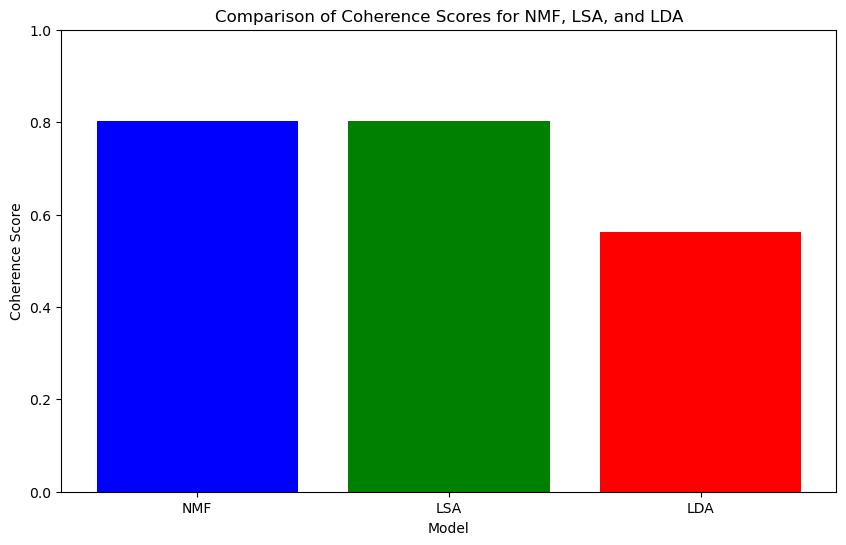

In [107]:
# Best NMF parameters
best_nmf_params = {'alpha_W': 0.05, 'l1_ratio': 0.0, 'n_components': 5}

# Initialize and fit the best NMF model
best_nmf_model = NMF(n_components=best_nmf_params['n_components'], 
                     alpha_W=best_nmf_params['alpha_W'], 
                     l1_ratio=best_nmf_params['l1_ratio'], 
                     random_state=42, 
                     max_iter=500)
W_best_nmf = best_nmf_model.fit_transform(tfidf_text_vectors)
H_best_nmf = best_nmf_model.components_

# Function to display topics
def display_topics(model, features, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx}:")
        print(" ".join([features[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display topics for the best NMF model
display_topics(best_nmf_model, tfidf_text_vectorizer.get_feature_names_out())

# Plot the coherence scores for comparison
models = ['NMF', 'LSA', 'LDA']
coherence_scores = [0.8030625637081061, 0.8030625637081061, 0.561247801537416]

plt.figure(figsize=(10, 6))
plt.bar(models, coherence_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Coherence Score')
plt.title('Comparison of Coherence Scores for NMF, LSA, and LDA')
plt.ylim(0, 1)
plt.show()
